In [1]:
#import sys
#sys.modules[__name__].__dict__.clear()

import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


Curve Resolution

In [2]:
is_high_res = True

Layer Definition

In [3]:
# standard silicon wg 220 x 500 nm
# final partial etch = 100 -0+1-2

layer_test = (1,0)

layer_Si_full = (1,0)
layer_Si_partial = (2,0)

layer_BOX = (6,0)
layer_LTO = (7,0)
layer_PSG = (8,0)

layer_polySi_move = (3,0)
layer_polySi_fixed = (3,0)
layer_polySi_top = (5,0)

layer_metal = (9,0)

layer_alignment = (0,0)

layer_SiONWG_0 = (101,0)
layer_SiONWG_cut = (102,0)

layer_lensPR =(105,0)

layer_SiONWG = (106,0)
layer_SiONDisk = (107,0)
layer_SiONMask = (108,0)
layer_SiONWG_Only = (111,0)
layer_SiONRev = (114,0)

layer_asml_chip = (501,0)
layer_gcaws_chip = (502,0)

Disk Definition

In [4]:
#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_disk(radius, layer):
    
    if is_high_res:
        angle_res = 0.2
    else:
        angle_res = 2.5

    disk_ref = gf.components.circle(radius = radius, angle_resolution=angle_res, layer=layer)
    
    disk = gf.Component()
    disk0 = disk.add_ref(disk_ref)
    #disk.add_port(
    #    name="o1", center=[radius-port_edge, 0], width=port_width, orientation=0, layer=layer
    #)
    disk.add_port(
        name="o_c", center=[0, 0], width=1, orientation=0, layer=layer
    )
    return disk

In [5]:
radius_eg = 20
port_edge_eg = 1
port_width_eg = 7.4
layer_eg = layer_test


disk_test = draw_disk(radius_eg, port_edge_eg, port_width_eg, layer_eg)
disk_test.draw_ports()
disk_test.plot()
disk_test.show()
disk_test.pprint_ports()

ValueError: No active PDK. Import and activate a PDK, or activate the generic PDK with `gf.gpdk.PDK.activate()`.

In [ ]:
#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_disk_mask(radius, lens_mask_overlap, layer):
    
    disk_0 = gf.Component()
    disk_ref = draw_disk(radius, layer); disk = disk_0.add_ref(disk_ref)

    rect_0 = gf.Component()
    rect_0.add_polygon([(radius-lens_mask_overlap, -radius/2-1), (radius+1, -radius/2-1), (radius+1, radius/2+1), (radius-lens_mask_overlap, radius/2+1)], layer=layer)

    operation = "not"
    disk_mask_temp = gf.boolean(disk_0, rect_0, operation=operation, layer = layer)

    disk_mask = gf.Component()
    disk_mask0 = disk_mask.add_ref(disk_mask_temp)
    
    disk_mask.add_port(
        name="o_c", center=[0, 0], width=1, orientation=0, layer=layer
    )
    
    return disk_mask


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center     ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o_c  │ 1.0   │ 0.0         │ 1     │ (0.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴───────┴────────────┴───────────┘

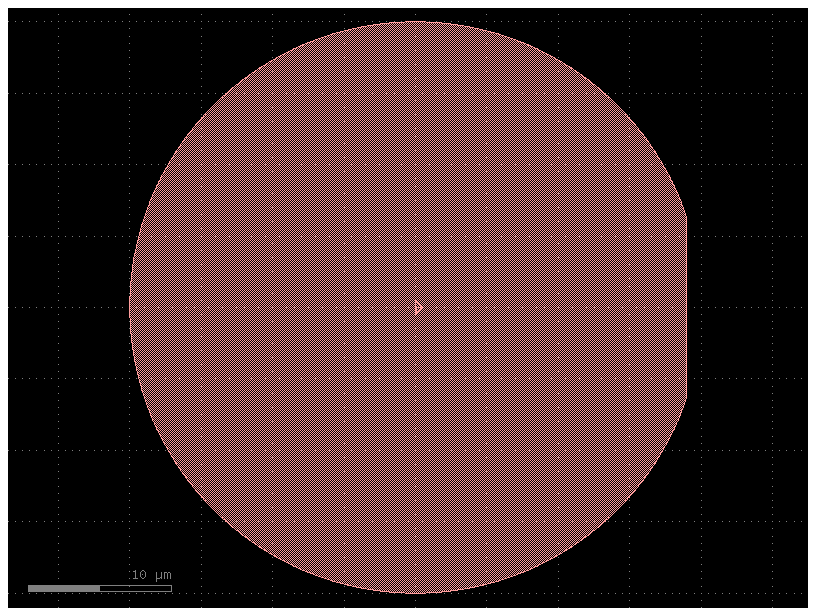

In [ ]:
radius_eg = 20
layer_eg = layer_test
lens_mask_overlap_eg = 1

disk_mask_test = draw_disk_mask(radius_eg, lens_mask_overlap_eg, layer_eg)
disk_mask_test.draw_ports()
disk_mask_test.plot()
disk_mask_test.show()
disk_mask_test.pprint_ports()

In [ ]:
#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_disk_mask_compact(radius, lens_mask_overlap, taper_width, layer):
    
    disk_0 = gf.Component()
    disk_ref = draw_disk(radius, layer); disk = disk_0.add_ref(disk_ref)

    disk_1 = gf.Component()
    disk_in_ref = draw_disk(radius-lens_mask_overlap, layer); disk_in = disk_1.add_ref(disk_in_ref)

    rect_0 = gf.Component()
    rect_0.add_polygon([(radius-lens_mask_overlap-1, -taper_width/2-0.3), (radius+1, -taper_width/2-0.3), (radius+1, taper_width/2+0.3), (radius-lens_mask_overlap-1, taper_width/2+0.3)], layer=layer)

    operation = "not"
    disk_mask_temp = gf.boolean(disk_0, rect_0, operation=operation, layer = layer)

    disk_mask = gf.Component()
    disk_mask0 = disk_mask.add_ref(disk_mask_temp)

    operation = "or"
    disk_mask_compact_temp = gf.boolean(disk_mask0, disk_in, operation=operation, layer = layer)

    disk_mask_compact = gf.Component()
    disk_mask_compact0 = disk_mask_compact.add_ref(disk_mask_compact_temp)
    
    disk_mask_compact.add_port(
        name="o_c", center=[0, 0], width=1, orientation=0, layer=layer
    )
    
    return disk_mask_compact


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center     ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o_c  │ 1.0   │ 0.0         │ 1     │ (0.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴───────┴────────────┴───────────┘

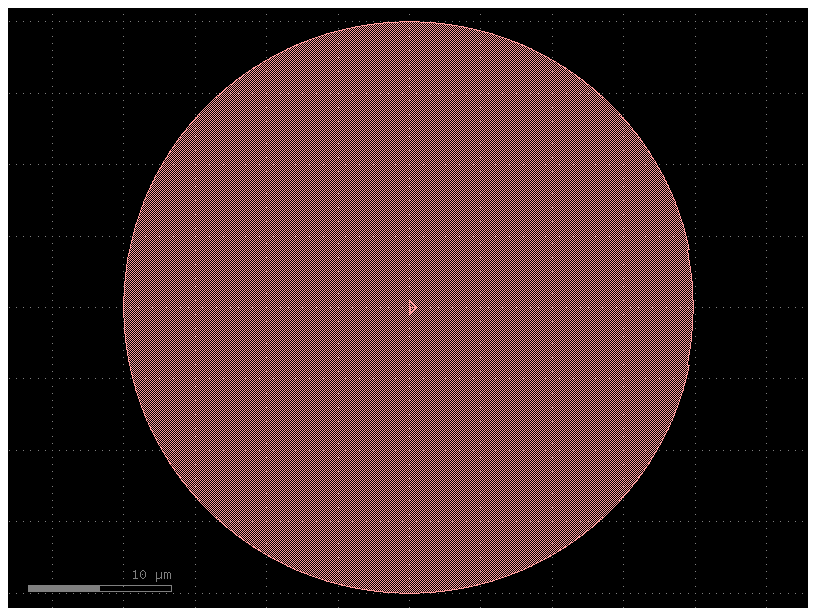

In [ ]:
radius_eg2 = 20
taper_width_eg2 = 7.5
layer_eg2 = layer_test
lens_mask_overlap_eg2 = 0.15

disk_mask_compact_test = draw_disk_mask_compact(radius_eg2, lens_mask_overlap_eg2, taper_width_eg2, layer_eg2)
disk_mask_compact_test.draw_ports()
disk_mask_compact_test.plot()
disk_mask_compact_test.show()
disk_mask_compact_test.pprint_ports()

Taper Definition

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_taper(width_start, width_end, taper_length, layer):
    
    taper = gf.Component()
    taper.add_polygon([(0, -width_start/2), (taper_length, -width_end/2), (taper_length, width_end/2), (0, width_start/2)], layer=layer);
    taper.add_port(
        name="o2", center=[taper_length, 0], width=width_end, orientation=0, layer=layer
    )
    taper.add_port(
        name="o1", center=[0, 0], width=width_start, orientation=180, layer=layer
    )
    return taper

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center      ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o2   │ 1.8   │ 0.0         │ 1     │ (55.0, 0.0) │ optical   │
│ o1   │ 7.4   │ 180.0       │ 1     │ (0.0, 0.0)  │ optical   │
└──────┴───────┴─────────────┴───────┴─────────────┴───────────┘

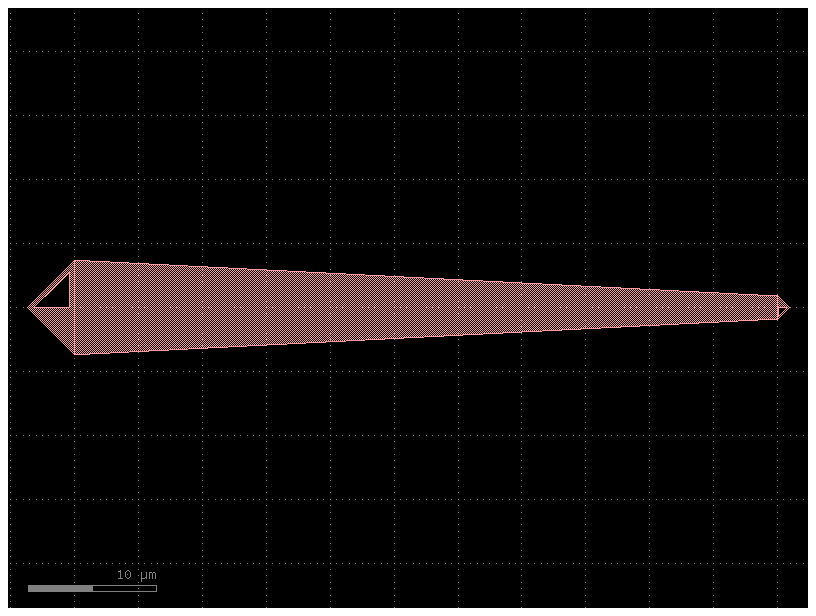

In [ ]:
width_start_eg = 7.4
width_end_eg = 1.8
taper_length_eg = 55
layer_eg = layer_test

taper_test = draw_taper(width_start_eg, width_end_eg, taper_length_eg, layer_eg)
taper_test.draw_ports()
taper_test.plot()
taper_test.show()
taper_test.pprint_ports()

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_straight(length, width, layer):
    WG_straight = gf.Component()
    WG_straight.add_polygon([(0, -width/2), (length, -width/2), (length, width/2), (0, width/2)], layer=layer)
    WG_straight.add_port(
        name="o1", center=[0, 0], width=width, orientation=180, layer=layer
    )
    WG_straight.add_port(
        name="o2", center=[length, 0], width=width, orientation=0, layer=layer
    )
    return WG_straight

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center      ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 1.8   │ 180.0       │ 1     │ (0.0, 0.0)  │ optical   │
│ o2   │ 1.8   │ 0.0         │ 1     │ (10.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴───────┴─────────────┴───────────┘

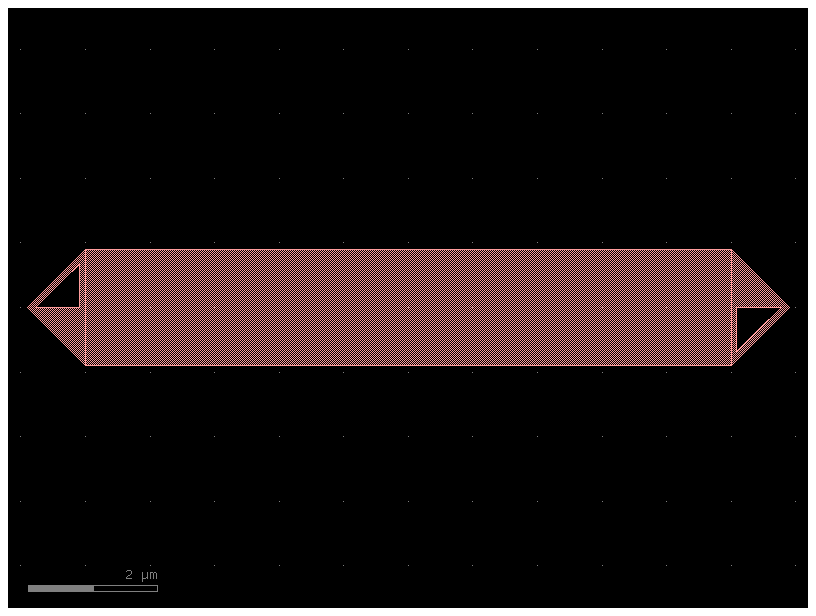

In [ ]:
width_eg = 1.8
length_eg = 10
layer_eg = layer_test

WG_test = draw_straight(length_eg, width_eg, layer_eg)
WG_test.draw_ports()
WG_test.plot()
WG_test.show()
WG_test.pprint_ports()

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_lens_WG_connect(lens_radius, overlap, taper_width, connect_length, layer):

    if is_high_res:
        angle_res = 0.2
    else:
        angle_res = 2.5

    disk_connect = gf.components.circle(radius = lens_radius-overlap, angle_resolution=angle_res, layer=layer)
    
    WG_connect = gf.Component()
    WG_connect.add_polygon([(lens_radius-overlap-1, -taper_width/2), (lens_radius+connect_length, -taper_width/2), (lens_radius+connect_length, taper_width/2), (lens_radius-overlap-1, taper_width/2)], layer=layer)

    operation = "not"
    connect_temp = gf.boolean(WG_connect, disk_connect, operation=operation, layer = layer)

    connect = gf.Component()
    connect_ref = connect.add_ref(connect_temp)
    connect_ref.dmovex(-lens_radius)

    connect.add_port(
        name="o1", center=[0, 0], width=taper_width, orientation=180, layer=layer
    )
    connect.add_port(
        name="o2", center=[connect_length, 0], width=taper_width, orientation=0, layer=layer
    )

    return connect

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center     ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 7.5   │ 180.0       │ 1     │ (0.0, 0.0) │ optical   │
│ o2   │ 7.5   │ 0.0         │ 1     │ (5.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴───────┴────────────┴───────────┘

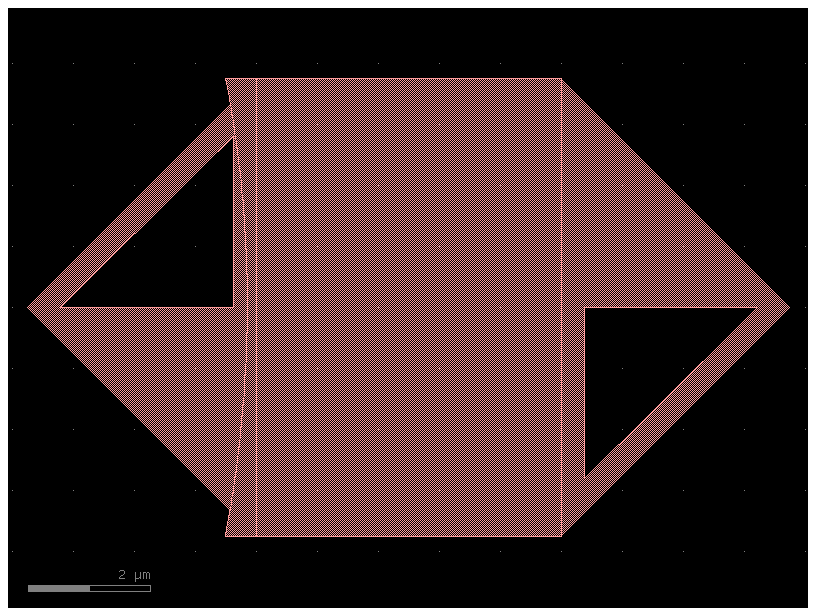

In [ ]:
lens_radius_eg = 20
overlap_eg = 0.15
taper_width_eg = 7.5
connect_length_eg = 5
layer_eg = layer_test

connect_test = draw_lens_WG_connect(radius_eg, overlap_eg, taper_width_eg, connect_length_eg, layer_eg)
connect_test.draw_ports()
connect_test.plot()
connect_test.show()
connect_test.pprint_ports()

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_bend_Bezier(WG_width, bend_length, bend_sep, npoints, layer):

    """
    By default, we do not allow the minimum radius violation
    """

    xs = gf.cross_section.cross_section(width=WG_width, layer = layer, offset = 0)
    bend = gf.components.bezier(control_points=((0, 0), (bend_length, 0), (bend_length, -bend_sep), (0, -bend_sep)), npoints=npoints, cross_section=xs)
    
    return bend

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center        ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 1.8   │ 180.0       │ 1     │ (0.0, 0.0)    │ optical   │
│ o2   │ 1.8   │ 180.0       │ 1     │ (0.0, -127.0) │ optical   │
└──────┴───────┴─────────────┴───────┴───────────────┴───────────┘

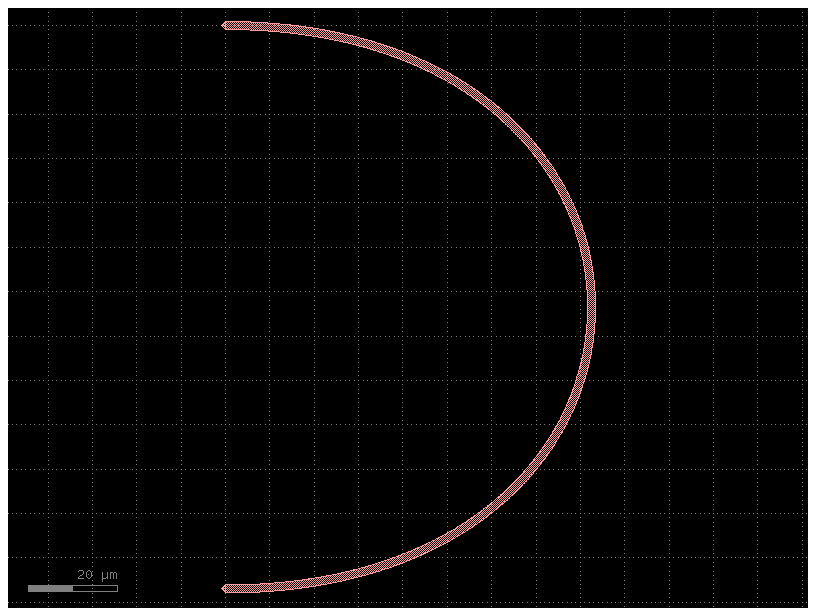

In [ ]:
WG_width_eg = 1.8
bend_length_eg = 110
bend_sep_eg = 127
npoints_eg = 1001
layer_eg = layer_test

bend_test = draw_bend_Bezier(WG_width_eg, bend_length_eg, bend_sep_eg, npoints_eg, layer_eg)
bend_test.draw_ports()
bend_test.plot()
bend_test.show()
bend_test.pprint_ports()

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_Euler(bend_radius, bend_angle, bend_npoints, bend_layer, bend_width):

    """
    By default, we do not allow the minimum radius violation
    """

    bend = gf.components.bend_euler(radius = bend_radius, angle=bend_angle, npoints=bend_npoints, layer=bend_layer, width=bend_width)
    return bend

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center         ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 1.8   │ 180.0       │ 1     │ (0.0, 0.0)     │ optical   │
│ o2   │ 1.8   │ 90.0        │ 1     │ (100.0, 100.0) │ optical   │
└──────┴───────┴─────────────┴───────┴────────────────┴───────────┘

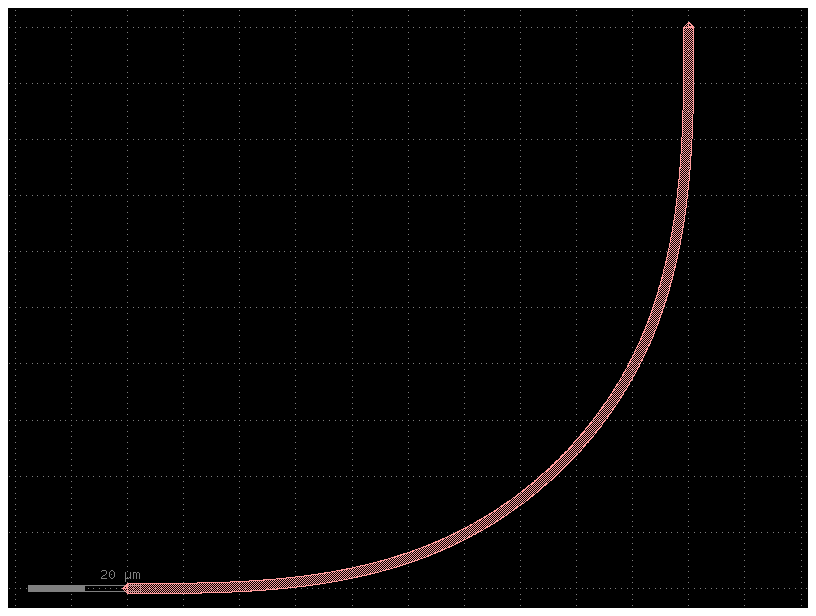

In [ ]:
bend_radius = 100
bend_angle = 90
bend_npoints = 1001
bend_width = 1.8
bend_layer = layer_test

bend_euler_test = draw_Euler(bend_radius, bend_angle, bend_npoints, bend_layer, bend_width)
bend_euler_test.draw_ports()
bend_euler_test.plot()
bend_euler_test.show()
bend_euler_test.pprint_ports()

Waveguide Crossing

Straight waveguide (input) (l_s1 x w0)
+
Taper (l_t1, w0 -> w_s1)
+
Straight waveguide (transition) (l_s2 x w_s1)
+
Taper (l_t2, w_s1 -> w_c)
+
Straight waveguide (center) (l_c x w_c)

In [ ]:
def draw_waveguide_cross_quarter(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c):
    
    c = gf.Component() #"IMC_loopback"

    input_WG_temp = draw_straight(length = l_s1, width=w0, layer=layer_Si_full); input_WG = c.add_ref(input_WG_temp)
    taper1_temp = draw_taper(width_start = w0, width_end = w_s1, taper_length = l_t1, layer=layer_Si_full); taper1 = c.add_ref(taper1_temp)
    transit_WG_temp = draw_straight(length = l_s2, width=w_s1, layer=layer_Si_full); transit_WG = c.add_ref(transit_WG_temp)
    taper2_temp = draw_taper(width_start = w_s1, width_end = w_c, taper_length = l_t2, layer=layer_Si_full); taper2 = c.add_ref(taper2_temp)
    center_WG_temp = draw_straight(length = l_c, width=w_c, layer=layer_Si_full); center_WG = c.add_ref(center_WG_temp)

    center_WG.dmovex(-l_c/2)
    taper2.connect('o2', center_WG.ports['o1'])
    transit_WG.connect('o2', taper2.ports['o1'])
    taper1.connect('o2', transit_WG.ports['o1'])
    input_WG.connect('o2', taper1.ports['o1'])

    return c


def draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab):
    
    c = gf.Component() #"IMC_loopback"

    WG_cross_quart_temp = draw_waveguide_cross_quarter(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c)
    WG_cross_quart_l = c.add_ref(WG_cross_quart_temp)
    WG_cross_quart_r = c.add_ref(WG_cross_quart_temp)
    WG_cross_quart_u = c.add_ref(WG_cross_quart_temp)
    WG_cross_quart_b = c.add_ref(WG_cross_quart_temp)
    
    WG_cross_quart_r.drotate(180)
    WG_cross_quart_u.drotate(-90)
    WG_cross_quart_b.drotate(90)

    P = [(-l_c/2-l_t2, w_s1_slab/2), (-l_c/2-l_t2-l_s2, w_s1_slab/2), (-l_c/2-l_t2-l_s2-l_t1, w0_slab/2), (-l_c/2-l_t2-l_s2-l_t1-l_s1, w0_slab/2)]

    def mirror_x_rev(points): #沿 x 轴镜像，并反转顺序
        return [(x, -y) for (x, y) in points[::-1]]

    def rotate_90(points): #逆时针 90°"""
        return [(-y, x) for (x, y) in points]

    def rotate_180(points):
        return [(-x, -y) for (x, y) in points]

    def rotate_270(points):
        return [(y, -x) for (x, y) in points]

    P0 = P + mirror_x_rev(P)
    pts = (P0 + rotate_90(P0) + rotate_180(P0) + rotate_270(P0))

    c.add_polygon(pts, layer=layer_Si_partial)

    return c

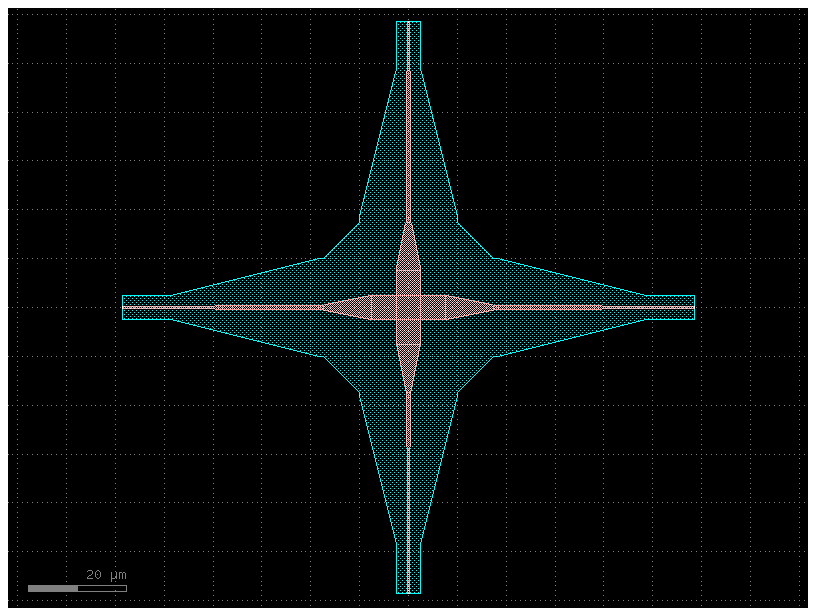

In [ ]:
w0 = 0.45
w_s1 = 1
w_c = 5
l_s1 = 10
l_t1 = 30
l_s2 = 1
l_t2 = 10
l_c = 15
w0_slab = 5
w_s1_slab = 20

WG_cross_test0 = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross_test0.plot()
WG_cross_test0.show()

Directional Coupler

Bend
+
Taper
+
Bend
+
Slab
+
90 degree Bend
(Mirror)

In [ ]:
def draw_coupler_bend(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius):
    
    coupler_bend = gf.Component() #"IMC_loopback"

    # Left Bend
    bend_left_temp = gf.components.bezier(
    control_points=((-coupling_length/2-bend_length, -input_width/2 - extra_gap), (-coupling_length/2-bend_length/2, -input_width/2-extra_gap), (-coupling_length/2-bend_length/2, -input_width/2), (-coupling_length/2, -input_width/2)),  # 4点=三次Bezier
    npoints=1001, with_manhattan_facing_angles=True, cross_section=gf.cross_section.strip(width=input_width, layer=layer_Si_full))
    bend_left = coupler_bend.add_ref(bend_left_temp)

    # Right Bend
    bend_right_temp = gf.components.bezier(
    control_points=((coupling_length/2, -output_width/2), (coupling_length/2+bend_length/2, -output_width/2), (coupling_length/2+bend_length/2, -output_width/2-extra_gap), (coupling_length/2+bend_length, -output_width/2-extra_gap)),  # 4点=三次Bezier
    npoints=1001, with_manhattan_facing_angles=True, cross_section=gf.cross_section.strip(width=output_width, layer=layer_Si_full))
    bend_right = coupler_bend.add_ref(bend_right_temp)

    # Directional Coupler
    directional_coupler = coupler_bend.add_polygon([(-coupling_length/2, 0), (-coupling_length/2, -input_width), (coupling_length/2, -output_width), (coupling_length/2, 0)], layer=layer_Si_full)
    
    # Slab Taper
    taper_slab_temp = draw_taper(width_start = output_width, width_end = slab_width_half*2, taper_length = slab_taper_length, layer=layer_Si_partial); taper_slab = coupler_bend.add_ref(taper_slab_temp)
    taper_slab.dmovex(coupling_length/2+bend_length); taper_slab.dmovey(-output_width/2-extra_gap)
    taper_WG_temp = draw_straight(length = slab_taper_length, width=output_width, layer=layer_Si_full); taper_WG = coupler_bend.add_ref(taper_WG_temp)
    taper_WG.dmovex(coupling_length/2+bend_length); taper_WG.dmovey(-output_width/2-extra_gap)


    # Draw 90 degree turn
    turn_temp = gf.components.bend_euler(radius = turn_radius, angle=-90, npoints=1001, layer=layer_Si_full, width=output_width)
    turn = coupler_bend.add_ref(turn_temp)
    turn.dmovex(coupling_length/2+bend_length+slab_taper_length); turn.dmovey(-output_width/2-extra_gap)
    turn_slab_temp = gf.components.bend_euler(radius = turn_radius, angle=-90, npoints=1001, layer=layer_Si_partial, width=slab_width_half*2)
    turn_slab = coupler_bend.add_ref(turn_slab_temp)
    turn_slab.dmovex(coupling_length/2+bend_length+slab_taper_length); turn_slab.dmovey(-output_width/2-extra_gap)

    coupler_bend.add_port(
        name="o1", center=[coupling_length/2+bend_length+slab_taper_length, -output_width/2-extra_gap], width=output_width, orientation=0, layer=layer_alignment
    )
    coupler_bend.add_port(
        name="o2", center=[coupling_length/2+bend_length+slab_taper_length + turn_radius, -output_width/2-extra_gap - turn_radius], width=output_width, orientation=-90, layer=layer_alignment
    )

    return coupler_bend

def draw_coupler_bend_full(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius):
    
    coupler_bend_full = gf.Component() #"IMC_loopback"
    coupler_bend_half_temp = draw_coupler_bend(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius)
    coupler_bend_half1 = coupler_bend_full.add_ref(coupler_bend_half_temp)
    coupler_bend_half2 = coupler_bend_full.add_ref(coupler_bend_half_temp)
    coupler_bend_half2.dmirror_y()

    coupler_bend_half2.connect('o2', coupler_bend_half1.ports['o1'])

    return coupler_bend_full


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

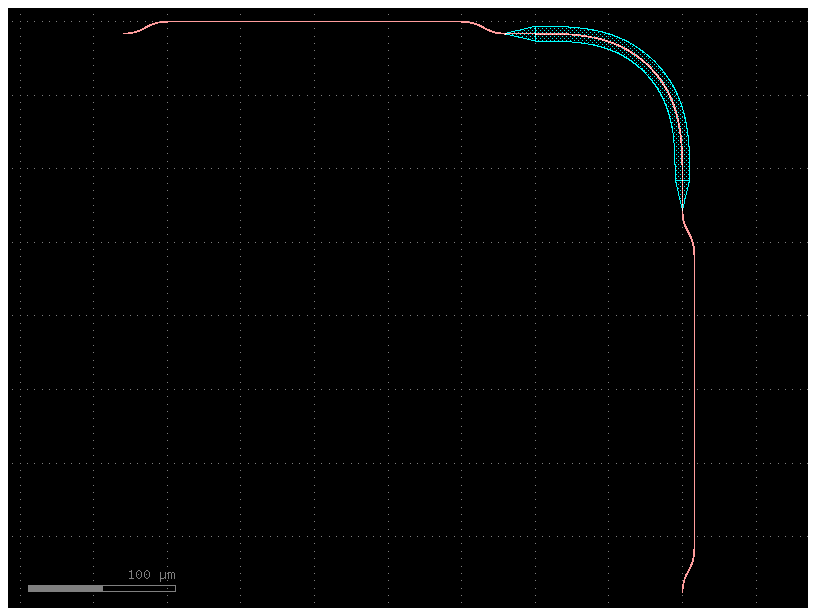

In [ ]:
input_width = 0.4; output_width = 0.5; coupling_length = 200
bend_length = 30; extra_gap = 8
slab_width_half = 5; slab_taper_length = 20
turn_radius = 100

coupler_bend_test = draw_coupler_bend_full(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius)
coupler_bend_test.plot()
coupler_bend_test.show()
coupler_bend_test.draw_ports()
coupler_bend_test.pprint_ports()

Bend (45 degree)

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_taper_bias(width_start, width_end, bias_end_down, taper_length, layer):
    
    taper = gf.Component()
    taper.add_polygon([(0, width_start/2), (0, -width_start/2), (taper_length, -width_end/2-bias_end_down), (taper_length, width_end/2-bias_end_down)], layer=layer)
    taper.add_port(
        name="o2", center=[taper_length, -bias_end_down], width=width_end, orientation=0, layer=layer
    )
    taper.add_port(
        name="o1", center=[0, 0], width=width_start, orientation=180, layer=layer
    )
    return taper

@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_taper_withslab(WG_width_start, WG_width_end, slab_width_start, slab_width_end, taper_length, layer_WG, layer_slab):
    
    taper = gf.Component()
    taper.add_polygon([(0, -WG_width_start/2), (taper_length, -WG_width_end/2), (taper_length, WG_width_end/2), (0, WG_width_start/2)], layer=layer_WG);
    taper.add_port(
        name="o2w", center=[taper_length, 0], width=WG_width_end, orientation=0, layer=layer_WG
    )
    taper.add_port(
        name="o1w", center=[0, 0], width=WG_width_start, orientation=180, layer=layer_WG
    )

    taper.add_polygon([(0, -slab_width_start/2), (taper_length, -slab_width_end/2), (taper_length, slab_width_end/2), (0, slab_width_start/2)], layer=layer_slab);
    taper.add_port(
        name="o2s", center=[taper_length, 0], width=slab_width_end, orientation=0, layer=layer_slab
    )
    taper.add_port(
        name="o1s", center=[0, 0], width=slab_width_start, orientation=180, layer=layer_slab
    )
    return taper


In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_coupler_bend45(input_width, output_width, coupling_length, slab_width_full, slab_taper_length, turn_radius, turn_length):
    
    coupler_bend = gf.Component() #"IMC_loopback"

    # Left Bend
    bend_left_temp = gf.components.bend_euler(radius = turn_radius, angle=-45, npoints=1001, width=input_width, layer=layer_Si_full)
    bend_left = coupler_bend.add_ref(bend_left_temp)
    bend_left.mirror_x()

    # Right Bend
    bend_right_temp = gf.components.bend_euler(radius = turn_radius, angle=-45, npoints=1001, width=output_width, layer=layer_Si_full)
    bend_right = coupler_bend.add_ref(bend_right_temp)

    # Directional Coupler
    directional_coupler_temp = draw_taper_bias(input_width, output_width, (output_width-input_width)/2, coupling_length, layer=layer_Si_full)
    directional_coupler = coupler_bend.add_ref(directional_coupler_temp)
    directional_coupler.dmovey(-input_width/2); directional_coupler.dmovex(-coupling_length/2)

    bend_left.connect('o1', directional_coupler.ports['o1'])
    bend_right.connect('o1', directional_coupler.ports['o2'])
    
    # Slab Taper
    taper_withslab_temp = draw_taper_withslab(output_width, output_width, output_width, slab_width_full, slab_taper_length, layer_Si_full, layer_Si_partial)
    taper_withslab = coupler_bend.add_ref(taper_withslab_temp)
    taper_withslab.drotate(-45)

    taper_withslab.connect('o1w', bend_right.ports['o2'])

    # Draw 45 degree waveguides
    turn_WG_temp = draw_straight(turn_length, output_width, layer_Si_full)
    turn_WG = coupler_bend.add_ref(turn_WG_temp)
    turn_WG.drotate(-45)
    turn_slab_temp = draw_straight(turn_length, slab_width_full, layer_Si_partial)
    turn_slab = coupler_bend.add_ref(turn_slab_temp)
    turn_slab.drotate(-45)

    turn_WG.connect('o1', taper_withslab.ports['o2w'])
    turn_slab.connect('o1', taper_withslab.ports['o2s'])

    x_end, y_end = turn_WG.ports["o2"].center
    x_end = int(x_end); y_end = int(y_end)

    coupler_bend.add_port(
        name="o1", center=[x_end/1000, y_end/1000], width=output_width, orientation=-45, layer=layer_alignment
    )
    #coupler_bend.add_port(
    #    name="o2", center=[coupling_length/2+(turn_radius+slab_taper_length+turn_length)*math.sqrt(2)/2, -output_width/2 + turn_radius*(math.sqrt(2)/2-1) - (slab_taper_length+turn_length)*math.sqrt(2)/2], width=output_width, orientation=135, layer=layer_alignment
    #)

    return coupler_bend

@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length):
    
    coupler_bend_full = gf.Component() #"IMC_loopback"
    coupler_bend_half_temp = draw_coupler_bend45(input_width, output_width, coupling_length, slab_width_full, slab_taper_length, turn_radius, turn_length)
    coupler_bend_half1 = coupler_bend_full.add_ref(coupler_bend_half_temp)
    coupler_bend_half2 = coupler_bend_full.add_ref(coupler_bend_half_temp)
    coupler_bend_half2.dmirror_y()

    x_end, y_end = coupler_bend_half1.ports["o1"].center
    coupler_bend_half1.dmovex(-x_end/1000 + y_end/1000)

    # Add the gap
    coupler_bend_half1.dmovey(-input_width0/2-dc_gap); coupler_bend_half1.dmovex(-input_width0/2-dc_gap)
    # Add the extra gap (MEMS out state)
    coupler_bend_half1.dmovey(-extra_gap*math.sqrt(2)/2); coupler_bend_half1.dmovex(-extra_gap*math.sqrt(2)/2)

    coupler_bend_half2.connect('o1', coupler_bend_half1.ports['o1'])

    # Add Thru Port Waveguides
    coupler_thru_temp = draw_taper_bias(input_width0, output_width0, -(output_width0-input_width0)/2, coupling_length, layer_Si_full)
    coupler_thru = coupler_bend_full.add_ref(coupler_thru_temp); coupler_thru_ver = coupler_bend_full.add_ref(coupler_thru_temp)
    coupler_thru.dmovex(-input_width0/2-dc_gap-coupling_length/2-x_end/1000 + y_end/1000)
    coupler_thru_ver.drotate(90); coupler_thru_ver.dmovey(-input_width0/2-dc_gap-coupling_length/2-x_end/1000 + y_end/1000)

    # Add Thru Port Connecting Waveguides
    connect_length = int(x_end - 1000*(coupling_length/2 + (slab_taper_length+turn_length)*math.sqrt(2)/2) + 0.5)/1000
    connect_thru_left_temp = draw_straight(connect_length, input_width0, layer_Si_full)
    connect_thru_left = coupler_bend_full.add_ref(connect_thru_left_temp); connect_thru_left_ver = coupler_bend_full.add_ref(connect_thru_left_temp)
    connect_thru_left.connect('o2', coupler_thru.ports['o1']); connect_thru_left_ver.connect('o2', coupler_thru_ver.ports['o1'])
    connect_thru_right_temp = draw_straight(connect_length, output_width0, layer_Si_full)
    connect_thru_right = coupler_bend_full.add_ref(connect_thru_right_temp); connect_thru_right_ver = coupler_bend_full.add_ref(connect_thru_right_temp)
    connect_thru_right.connect('o1', coupler_thru.ports['o2']); connect_thru_right_ver.connect('o1', coupler_thru_ver.ports['o2'])

    # Add Thru Port Slabs
    coupler_thru_slab_temp = draw_taper_bias(input_width0+slab_width_half, output_width0+slab_width_half, -(output_width0-input_width0)/2, coupling_length, layer_Si_partial)
    coupler_thru_slab = coupler_bend_full.add_ref(coupler_thru_slab_temp); coupler_thru_slab_ver = coupler_bend_full.add_ref(coupler_thru_slab_temp)
    coupler_thru_slab.dmovex(-input_width0/2-dc_gap-coupling_length/2-x_end/1000 + y_end/1000)
    coupler_thru_slab_ver.drotate(90); coupler_thru_slab_ver.dmovey(-input_width0/2-dc_gap-coupling_length/2-x_end/1000 + y_end/1000)
    coupler_thru_slab.dmovey(slab_width_half/2); coupler_thru_slab_ver.dmovex(slab_width_half/2)

    connect_thru_slab_left_temp = draw_straight(connect_length, input_width0+slab_width_half, layer_Si_partial)
    connect_thru_slab_left = coupler_bend_full.add_ref(connect_thru_slab_left_temp); connect_thru_slab_left_ver = coupler_bend_full.add_ref(connect_thru_slab_left_temp)
    connect_thru_slab_left.connect('o2', coupler_thru_slab.ports['o1']); connect_thru_slab_left_ver.connect('o2', coupler_thru_slab_ver.ports['o1'])
    connect_thru_slab_right_temp = draw_straight(connect_length, output_width0+slab_width_half, layer_Si_partial)
    connect_thru_slab_right = coupler_bend_full.add_ref(connect_thru_slab_right_temp); connect_thru_slab_right_ver = coupler_bend_full.add_ref(connect_thru_slab_right_temp)
    connect_thru_slab_right.connect('o1', coupler_thru_slab.ports['o2']); connect_thru_slab_right_ver.connect('o1', coupler_thru_slab_ver.ports['o2'])

    return coupler_bend_full


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

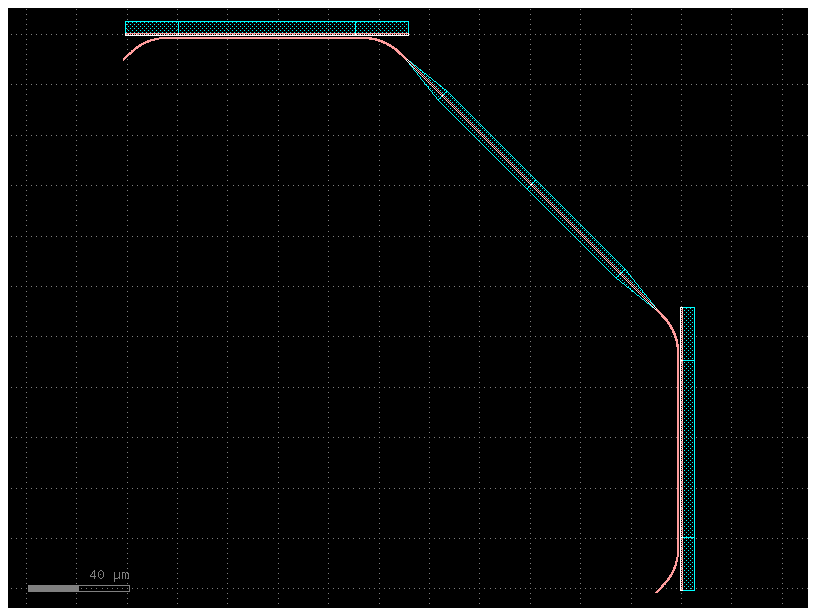

In [ ]:
input_width0 = 0.4; output_width0 = 0.4
input_width = 0.4; output_width = 0.5; coupling_length = 70
bend_length = 30; dc_gap = 0.1; extra_gap = 1
slab_width_full = 5; slab_width_half = 5; slab_taper_length = 20
turn_radius = 30; turn_length = 50

coupler_bend_test = draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length)
#draw_coupler_bend_full45(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius)
coupler_bend_test.plot()
coupler_bend_test.show()
coupler_bend_test.draw_ports()
coupler_bend_test.pprint_ports()

Directional Coupler Design Variant 1

Partial Rib
+
Strip

In [ ]:
def draw_coupler_bend_ribstrip_adc(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius):
    
    coupler_bend = gf.Component() #"IMC_loopback"

    # Left Bend
    bend_left_temp = gf.components.bend_euler(radius = turn_radius, angle=-45, npoints=1001, layer=layer_Si_full, width=output_width)
    bend_left = coupler_bend.add_ref(bend_left_temp)

    # Right Bend
    bend_right_temp = gf.components.bezier(
    control_points=((coupling_length/2, -output_width/2), (coupling_length/2+bend_length/2, -output_width/2), (coupling_length/2+bend_length/2, -output_width/2-extra_gap), (coupling_length/2+bend_length, -output_width/2-extra_gap)),  # 4点=三次Bezier
    npoints=1001, with_manhattan_facing_angles=True, cross_section=gf.cross_section.strip(width=output_width, layer=layer_Si_full))
    bend_right = coupler_bend.add_ref(bend_right_temp)

    # Directional Coupler
    directional_coupler = coupler_bend.add_polygon([(-coupling_length/2, 0), (-coupling_length/2, -input_width), (coupling_length/2, -output_width), (coupling_length/2, 0)], layer=layer_Si_full)
    
    # Slab Taper
    taper_slab_temp = draw_taper(width_start = output_width, width_end = slab_width_half*2, taper_length = slab_taper_length, layer=layer_Si_partial); taper_slab = coupler_bend.add_ref(taper_slab_temp)
    taper_slab.dmovex(coupling_length/2+bend_length); taper_slab.dmovey(-output_width/2-extra_gap)
    taper_WG_temp = draw_straight(length = slab_taper_length, width=output_width, layer=layer_Si_full); taper_WG = coupler_bend.add_ref(taper_WG_temp)
    taper_WG.dmovex(coupling_length/2+bend_length); taper_WG.dmovey(-output_width/2-extra_gap)


    # Draw 90 degree turn
    turn_temp = gf.components.bend_euler(radius = turn_radius, angle=-90, npoints=1001, layer=layer_Si_full, width=output_width)
    turn = coupler_bend.add_ref(turn_temp)
    turn.dmovex(coupling_length/2+bend_length+slab_taper_length); turn.dmovey(-output_width/2-extra_gap)
    turn_slab_temp = gf.components.bend_euler(radius = turn_radius, angle=-90, npoints=1001, layer=layer_Si_partial, width=slab_width_half*2)
    turn_slab = coupler_bend.add_ref(turn_slab_temp)
    turn_slab.dmovex(coupling_length/2+bend_length+slab_taper_length); turn_slab.dmovey(-output_width/2-extra_gap)

    coupler_bend.add_port(
        name="o1", center=[coupling_length/2+bend_length+slab_taper_length, -output_width/2-extra_gap], width=output_width, orientation=0, layer=layer_alignment
    )
    coupler_bend.add_port(
        name="o2", center=[coupling_length/2+bend_length+slab_taper_length + turn_radius, -output_width/2-extra_gap - turn_radius], width=output_width, orientation=-90, layer=layer_alignment
    )

    return coupler_bend

def draw_coupler_bend_full(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius):
    
    coupler_bend_full = gf.Component() #"IMC_loopback"
    coupler_bend_half_temp = draw_coupler_bend(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius)
    coupler_bend_half1 = coupler_bend_full.add_ref(coupler_bend_half_temp)
    coupler_bend_half2 = coupler_bend_full.add_ref(coupler_bend_half_temp)
    coupler_bend_half2.dmirror_y()

    coupler_bend_half2.connect('o2', coupler_bend_half1.ports['o1'])

    return coupler_bend_full


MEMS Part

Switch (Poly Layer)

Proof Mass

In [ ]:
#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_proofmass(length, height, hole_diameter, hole_gap, layer):
    
    d_r = hole_diameter; p_r = hole_diameter + hole_gap
    proof_full = gf.Component()

    # Proff Mass with Release Holes
    proof = gf.Component()
    proof_temp = gf.components.rectangle(size=(length, height), layer=layer)
    proof_ref = proof.add_ref(proof_temp)
    proof_ref.dmovex(-length/2)
    proof_ref.dmovey(-height/2)
    
    # Release Hole Array
    hole_array = gf.Component()
    hole_temp = gf.components.rectangle(size=(d_r, d_r), layer=layer)
    n_hole_l = int(length/p_r) # 向下取整，向上用math.ceil
    n_hole_h = int(height/p_r)

    hole_array_ref = {}

    for ii in range(n_hole_l):
        for jj in range(n_hole_h):
            hole_array_ref[ii*n_hole_l+jj] = hole_array.add_ref(hole_temp)
            hole_array_ref[ii*n_hole_l+jj].dmovex(-d_r/2 - p_r*(n_hole_l-1)/2 + ii*p_r); hole_array_ref[ii*n_hole_l+jj].dmovey(-d_r/2 - p_r*(n_hole_h-1)/2 + jj*p_r)
    
    # Create Release Holes on Proof Mass (Boolean Operation)
    operation = "not"
    proof_with_hole_temp = gf.boolean(proof, hole_array, operation=operation, layer = layer)
    proof_with_hole = proof_full.add_ref(proof_with_hole_temp)

    #proof_full.add_port(
    #    name="o_top", center=[0, 0], width=0, orientation=180, layer=layer_alignment
    #)
    #proof_full.add_port(
    #    name="o_bottom", center=[0, 0], width=0, orientation=0, layer=layer_alignment
    #)

    return proof_full


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

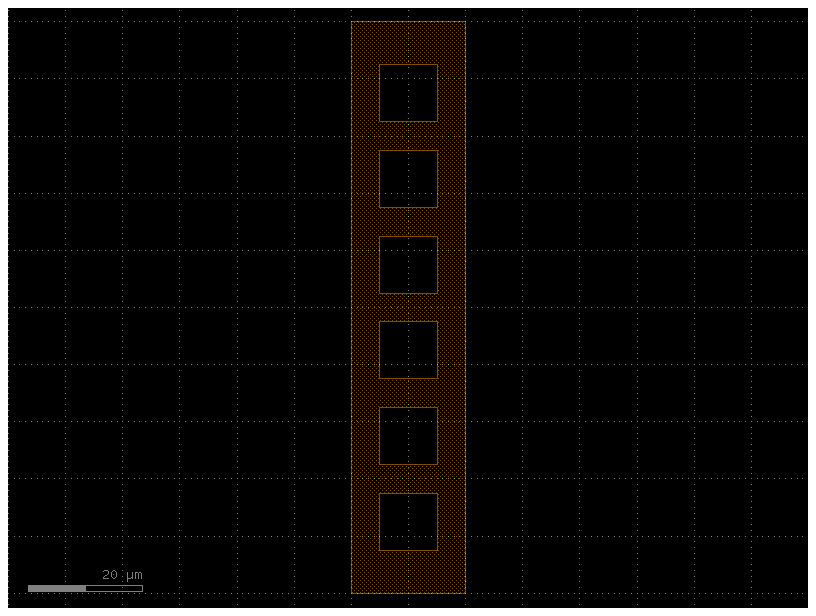

In [ ]:
proof_test = draw_proofmass(20,100,10,5,layer_polySi_move)
proof_test.draw_ports()
proof_test.plot()
proof_test.show()
proof_test.pprint_ports()

Fixed Anchor (fully enclosed)

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_fixedanchor_smallhole(length, height, hole_diameter_max, linewidth):
    
    p_r = hole_diameter_max + linewidth
    n_hole_l = math.ceil((length-linewidth)/p_r) # 向上用math.ceil
    n_hole_h = math.ceil((height-linewidth)/p_r)

    d_r_l = (int(100*(length-linewidth)/n_hole_l)) / 100 - linewidth
    d_r_h = (int(100*(height-linewidth)/n_hole_h)) / 100 - linewidth

    proof_full = gf.Component()

    # Proff Mass with Release Holes
    proof = gf.Component()
    proof_temp = gf.components.rectangle(size=(length, height), layer=layer_polySi_move)
    proof_ref = proof.add_ref(proof_temp)
    proof_ref.dmovex(-length/2)
    proof_ref.dmovey(-height/2)

    proof_inner = gf.Component()
    proof_inner_temp = gf.components.rectangle(size=(length-2*linewidth, height-2*linewidth), layer=layer_polySi_move)
    proof_inner_ref = proof_inner.add_ref(proof_inner_temp)
    proof_inner_ref.dmovex(-length/2+linewidth)
    proof_inner_ref.dmovey(-height/2+linewidth)

    proof_outerframe = gf.Component()
    operation = "not"
    proof_outerframe = gf.boolean(proof, proof_inner, operation=operation, layer = layer_polySi_move)
    #proof_outerframe = proof_full.add_ref(proof_outerframe_temp)
    
    # # Release Hole Array
    # hole_array = gf.Component()
    # hole_temp = gf.components.rectangle(size=(d_r_l, d_r_h), layer=layer_polySi_move)
    # p_r_l = d_r_l + linewidth
    # p_r_h = d_r_h + linewidth
    # 
    # hole_array_ref = {}
    # 
    # for ii in range(n_hole_l):
    #     for jj in range(n_hole_h):
    #         hole_array_ref[ii*n_hole_l+jj] = hole_array.add_ref(hole_temp)
    #         hole_array_ref[ii*n_hole_l+jj].dmovex(-d_r_l/2 - p_r_l*(n_hole_l-1)/2 + ii*p_r_l); hole_array_ref[ii*n_hole_l+jj].dmovey(-d_r_h/2 - p_r_h*(n_hole_h-1)/2 + jj*p_r_h)

    # Framework Array
    framework = gf.Component()
    frame_l_temp = gf.components.rectangle(size=(length, linewidth), layer=layer_polySi_move)
    frame_h_temp = gf.components.rectangle(size=(linewidth, height), layer=layer_polySi_move)
    p_r_l = d_r_l + linewidth
    p_r_h = d_r_h + linewidth

    frame_array_ref = {}

    for ii in range(n_hole_l-1):
        frame_array_ref[ii] = framework.add_ref(frame_h_temp)
        frame_array_ref[ii].dmovex(-linewidth/2 - p_r_l*(n_hole_l-2)/2 + ii*p_r_l); frame_array_ref[ii].dmovey(-height/2)

    for jj in range(n_hole_h-1):
        frame_array_ref[n_hole_l+jj] = framework.add_ref(frame_l_temp)
        frame_array_ref[n_hole_l+jj].dmovex(-length/2); frame_array_ref[n_hole_l+jj].dmovey(-linewidth/2 - p_r_h*(n_hole_h-2)/2 + jj*p_r_h)    

    # Create Release Holes on Proof Mass (Boolean Operation)
    operation = "or"
    proof_with_hole_temp = gf.boolean(proof_outerframe, framework, operation=operation, layer = layer_polySi_move)
    proof_with_hole = proof_full.add_ref(proof_with_hole_temp)

    #proof_full.add_port(
    #    name="o_top", center=[0, 0], width=0, orientation=180, layer=layer_alignment
    #)
    #proof_full.add_port(
    #    name="o_bottom", center=[0, 0], width=0, orientation=0, layer=layer_alignment
    #)

    return proof_full


@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_fixedanchor_largehole(length, height, hole_diameter_max, linewidth):
    
    p_r = hole_diameter_max + linewidth
    n_hole_l = int((length-linewidth)/p_r) # 向下取整，向上用math.ceil
    n_hole_h = int((height-linewidth)/p_r)

    d_r_l = (int(100*(length-linewidth)/n_hole_l)) / 100 - linewidth
    d_r_h = (int(100*(height-linewidth)/n_hole_h)) / 100 - linewidth

    proof_full = gf.Component()

    # Proff Mass with Release Holes
    proof = gf.Component()
    proof_temp = gf.components.rectangle(size=(length, height), layer=layer_polySi_move)
    proof_ref = proof.add_ref(proof_temp)
    proof_ref.dmovex(-length/2)
    proof_ref.dmovey(-height/2)

    proof_inner = gf.Component()
    proof_inner_temp = gf.components.rectangle(size=(length-2*linewidth, height-2*linewidth), layer=layer_polySi_move)
    proof_inner_ref = proof_inner.add_ref(proof_inner_temp)
    proof_inner_ref.dmovex(-length/2+linewidth)
    proof_inner_ref.dmovey(-height/2+linewidth)

    proof_outerframe = gf.Component()
    operation = "not"
    proof_outerframe = gf.boolean(proof, proof_inner, operation=operation, layer = layer_polySi_move)
    #proof_outerframe = proof_full.add_ref(proof_outerframe_temp)
    
    # # Release Hole Array
    # hole_array = gf.Component()
    # hole_temp = gf.components.rectangle(size=(d_r_l, d_r_h), layer=layer_polySi_move)
    # p_r_l = d_r_l + linewidth
    # p_r_h = d_r_h + linewidth
    # 
    # hole_array_ref = {}
    # 
    # for ii in range(n_hole_l):
    #     for jj in range(n_hole_h):
    #         hole_array_ref[ii*n_hole_l+jj] = hole_array.add_ref(hole_temp)
    #         hole_array_ref[ii*n_hole_l+jj].dmovex(-d_r_l/2 - p_r_l*(n_hole_l-1)/2 + ii*p_r_l); hole_array_ref[ii*n_hole_l+jj].dmovey(-d_r_h/2 - p_r_h*(n_hole_h-1)/2 + jj*p_r_h)

    # Framework Array
    framework = gf.Component()
    frame_l_temp = gf.components.rectangle(size=(length, linewidth), layer=layer_polySi_move)
    frame_h_temp = gf.components.rectangle(size=(linewidth, height), layer=layer_polySi_move)
    p_r_l = d_r_l + linewidth
    p_r_h = d_r_h + linewidth

    frame_array_ref = {}

    for ii in range(n_hole_l-1):
        frame_array_ref[ii] = framework.add_ref(frame_h_temp)
        frame_array_ref[ii].dmovex(-linewidth/2 - p_r_l*(n_hole_l-2)/2 + ii*p_r_l); frame_array_ref[ii].dmovey(-height/2)

    for jj in range(n_hole_h-1):
        frame_array_ref[n_hole_l+jj] = framework.add_ref(frame_l_temp)
        frame_array_ref[n_hole_l+jj].dmovex(-length/2); frame_array_ref[n_hole_l+jj].dmovey(-linewidth/2 - p_r_h*(n_hole_h-2)/2 + jj*p_r_h)    

    # Create Release Holes on Proof Mass (Boolean Operation)
    operation = "or"
    proof_with_hole_temp = gf.boolean(proof_outerframe, framework, operation=operation, layer = layer_polySi_move)
    proof_with_hole = proof_full.add_ref(proof_with_hole_temp)

    #proof_full.add_port(
    #    name="o_top", center=[0, 0], width=0, orientation=180, layer=layer_alignment
    #)
    #proof_full.add_port(
    #    name="o_bottom", center=[0, 0], width=0, orientation=0, layer=layer_alignment
    #)

    return proof_full


@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_fixedanchor_midhole(length, height, hole_diameter_max, linewidth):
    
    p_r = hole_diameter_max + linewidth
    n_hole_l = int((length-linewidth)/p_r+0.5) # 四舍五入，向上用math.ceil
    n_hole_h = int((height-linewidth)/p_r+0.5)

    d_r_l = (int(100*(length-linewidth)/n_hole_l)) / 100 - linewidth
    d_r_h = (int(100*(height-linewidth)/n_hole_h)) / 100 - linewidth

    proof_full = gf.Component()

    # Proff Mass with Release Holes
    proof = gf.Component()
    proof_temp = gf.components.rectangle(size=(length, height), layer=layer_polySi_move)
    proof_ref = proof.add_ref(proof_temp)
    proof_ref.dmovex(-length/2)
    proof_ref.dmovey(-height/2)

    proof_inner = gf.Component()
    proof_inner_temp = gf.components.rectangle(size=(length-2*linewidth, height-2*linewidth), layer=layer_polySi_move)
    proof_inner_ref = proof_inner.add_ref(proof_inner_temp)
    proof_inner_ref.dmovex(-length/2+linewidth)
    proof_inner_ref.dmovey(-height/2+linewidth)

    proof_outerframe = gf.Component()
    operation = "not"
    proof_outerframe = gf.boolean(proof, proof_inner, operation=operation, layer = layer_polySi_move)
    #proof_outerframe = proof_full.add_ref(proof_outerframe_temp)
    
    # # Release Hole Array
    # hole_array = gf.Component()
    # hole_temp = gf.components.rectangle(size=(d_r_l, d_r_h), layer=layer_polySi_move)
    # p_r_l = d_r_l + linewidth
    # p_r_h = d_r_h + linewidth
    # 
    # hole_array_ref = {}
    # 
    # for ii in range(n_hole_l):
    #     for jj in range(n_hole_h):
    #         hole_array_ref[ii*n_hole_l+jj] = hole_array.add_ref(hole_temp)
    #         hole_array_ref[ii*n_hole_l+jj].dmovex(-d_r_l/2 - p_r_l*(n_hole_l-1)/2 + ii*p_r_l); hole_array_ref[ii*n_hole_l+jj].dmovey(-d_r_h/2 - p_r_h*(n_hole_h-1)/2 + jj*p_r_h)

    # Framework Array
    framework = gf.Component()
    frame_l_temp = gf.components.rectangle(size=(length, linewidth), layer=layer_polySi_move)
    frame_h_temp = gf.components.rectangle(size=(linewidth, height), layer=layer_polySi_move)
    p_r_l = d_r_l + linewidth
    p_r_h = d_r_h + linewidth

    frame_array_ref = {}

    for ii in range(n_hole_l-1):
        frame_array_ref[ii] = framework.add_ref(frame_h_temp)
        frame_array_ref[ii].dmovex(-linewidth/2 - p_r_l*(n_hole_l-2)/2 + ii*p_r_l); frame_array_ref[ii].dmovey(-height/2)

    for jj in range(n_hole_h-1):
        frame_array_ref[n_hole_l+jj] = framework.add_ref(frame_l_temp)
        frame_array_ref[n_hole_l+jj].dmovex(-length/2); frame_array_ref[n_hole_l+jj].dmovey(-linewidth/2 - p_r_h*(n_hole_h-2)/2 + jj*p_r_h)    

    # Create Release Holes on Proof Mass (Boolean Operation)
    operation = "or"
    proof_with_hole_temp = gf.boolean(proof_outerframe, framework, operation=operation, layer = layer_polySi_move)
    proof_with_hole = proof_full.add_ref(proof_with_hole_temp)

    #proof_full.add_port(
    #    name="o_top", center=[0, 0], width=0, orientation=180, layer=layer_alignment
    #)
    #proof_full.add_port(
    #    name="o_bottom", center=[0, 0], width=0, orientation=0, layer=layer_alignment
    #)

    return proof_full

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

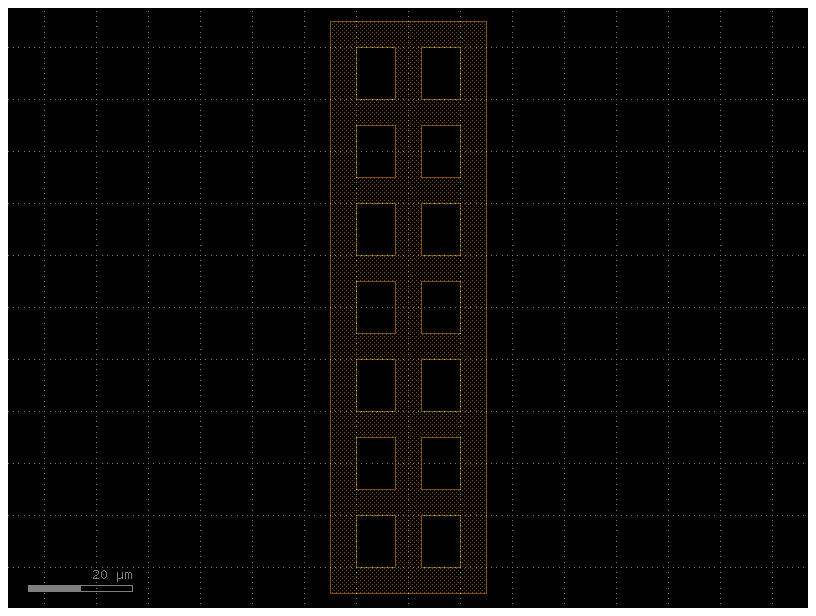

In [ ]:
proof_test = draw_fixedanchor_smallhole(30,110,10,5)
proof_test.draw_ports()
proof_test.plot()
proof_test.show()
proof_test.pprint_ports()

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_fixedanchor_cut_smallhole(length, height, left_cut, top_cut, hole_diameter_max, linewidth):
    
    p_r = hole_diameter_max + linewidth
    n_hole_l = math.ceil((length-linewidth)/p_r) # 向上用math.ceil
    n_hole_h = math.ceil((height-linewidth)/p_r)

    d_r_l = (int(100*(length-linewidth)/n_hole_l)) / 100 - linewidth
    d_r_h = (int(100*(height-linewidth)/n_hole_h)) / 100 - linewidth

    proof_full = gf.Component()

    # Proff Mass with Release Holes
    proof_temp = gf.Component()
    proof = gf.Component()
    vtx = ([(0,0), (length,0), (length, height), (left_cut, height), (0, height-top_cut)])
    proof_temp = gf.Component(); proof_temp.add_polygon(vtx, layer=layer_polySi_move); proof_ref = proof.add_ref(proof_temp)
    proof_ref.dmovex(-length/2)
    proof_ref.dmovey(-height/2)

    proof_inner = gf.Component()
    m = top_cut/left_cut; s = math.sqrt(1 + m**2)
    vtx_in = ([(linewidth,linewidth), (length-linewidth,linewidth), (length-linewidth, height-linewidth), ((top_cut-linewidth+linewidth*s)/m,  height-linewidth), (linewidth, height-top_cut + m*linewidth-linewidth*s)])
    proof_inner_temp = gf.Component(); proof_inner_temp.add_polygon(vtx_in, layer=layer_polySi_move); proof_inner_ref = proof_inner.add_ref(proof_inner_temp)
    proof_inner_ref.dmovex(-length/2)
    proof_inner_ref.dmovey(-height/2)

    proof_outerframe = gf.Component()
    operation = "not"
    proof_outerframe = gf.boolean(proof, proof_inner, operation=operation, layer = layer_polySi_move)
    #proof_outerframe = proof_full.add_ref(proof_outerframe_temp)
    
    # # Release Hole Array
    # hole_array = gf.Component()
    # hole_temp = gf.components.rectangle(size=(d_r_l, d_r_h), layer=layer_polySi_move)
    # p_r_l = d_r_l + linewidth
    # p_r_h = d_r_h + linewidth
    # 
    # hole_array_ref = {}
    # 
    # for ii in range(n_hole_l):
    #     for jj in range(n_hole_h):
    #         hole_array_ref[ii*n_hole_l+jj] = hole_array.add_ref(hole_temp)
    #         hole_array_ref[ii*n_hole_l+jj].dmovex(-d_r_l/2 - p_r_l*(n_hole_l-1)/2 + ii*p_r_l); hole_array_ref[ii*n_hole_l+jj].dmovey(-d_r_h/2 - p_r_h*(n_hole_h-1)/2 + jj*p_r_h)

    # Framework Array
    framework = gf.Component()
    frame_l_temp = gf.components.rectangle(size=(length, linewidth), layer=layer_polySi_move)
    frame_h_temp = gf.components.rectangle(size=(linewidth, height), layer=layer_polySi_move)
    p_r_l = d_r_l + linewidth
    p_r_h = d_r_h + linewidth

    frame_array_ref = {}

    for ii in range(n_hole_l-1):
        frame_array_ref[ii] = framework.add_ref(frame_h_temp)
        frame_array_ref[ii].dmovex(-linewidth/2 - p_r_l*(n_hole_l-2)/2 + ii*p_r_l); frame_array_ref[ii].dmovey(-height/2)

    for jj in range(n_hole_h-1):
        frame_array_ref[n_hole_l+jj] = framework.add_ref(frame_l_temp)
        frame_array_ref[n_hole_l+jj].dmovex(-length/2); frame_array_ref[n_hole_l+jj].dmovey(-linewidth/2 - p_r_h*(n_hole_h-2)/2 + jj*p_r_h)    

    # Create Release Holes on Proof Mass (Boolean Operation)
    proof_with_hole0 = gf.Component()
    operation = "or"
    proof_with_hole0 = gf.boolean(proof_outerframe, framework, operation=operation, layer = layer_polySi_move)

    triangle_cut = gf.Component()
    triangle_cut.add_polygon([(-length/2, height/2), (-length/2+left_cut, height/2), (-length/2, height/2-top_cut)], layer_polySi_move)
    operation = "not"
    proof_with_hole_temp = gf.boolean(proof_with_hole0, triangle_cut, operation=operation, layer = layer_polySi_move)
    proof_with_hole = proof_full.add_ref(proof_with_hole_temp)

    #proof_full.add_port(
    #    name="o_top", center=[0, 0], width=0, orientation=180, layer=layer_alignment
    #)
    #proof_full.add_port(
    #    name="o_bottom", center=[0, 0], width=0, orientation=0, layer=layer_alignment
    #)

    return proof_full

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

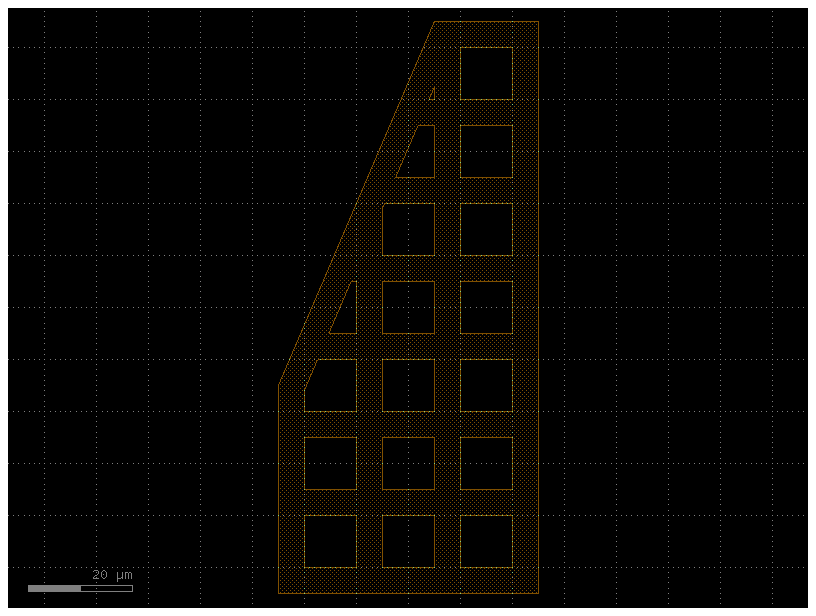

In [ ]:
proof_test = draw_fixedanchor_cut_smallhole(50,110,30,70,10,5)
proof_test.draw_ports()
proof_test.plot()
proof_test.show()
proof_test.pprint_ports()

Springs

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_spring_pair(spring_length, spring_width, spring_gap, anchor_gap_length, pad_length, pad_width):

    l_s = spring_length; w_s = spring_width; g_s = spring_gap
    l_sa = anchor_gap_length; l_c = pad_length; w_c = pad_width; 
    spring_pair = gf.Component()

    # Springs (First Group)
    spring_temp = gf.components.rectangle(size=(l_s, w_s), layer=layer_polySi_move)
    spring_upper_left = spring_pair.add_ref(spring_temp)
    spring_upper_left.drotate(180); spring_upper_left.dmovex(-l_sa/2)
    spring_lower_left = spring_pair.add_ref(spring_temp)
    spring_lower_left.drotate(180); spring_lower_left.dmovex(-l_sa/2); spring_lower_left.dmovey(-g_s-w_s)
    spring_upper_right = spring_pair.add_ref(spring_temp)
    spring_upper_right.dmovex(l_sa/2); spring_upper_right.dmovey(-w_s)
    spring_lower_right = spring_pair.add_ref(spring_temp)
    spring_lower_right.dmovex(l_sa/2); spring_lower_right.dmovey(-w_s - g_s-w_s)

    spring_connect_temp = gf.components.rectangle(size=(w_c, l_c), layer=layer_polySi_move)
    spring_connect_left = spring_pair.add_ref(spring_connect_temp)
    spring_connect_left.drotate(180); spring_connect_left.dmovex(-l_sa/2 - l_s); spring_connect_left.dmovey(-w_s-g_s/2 + l_c/2)
    spring_connect_right = spring_pair.add_ref(spring_connect_temp)
    spring_connect_right.dmovex(l_sa/2 + l_s); spring_connect_right.dmovey(-w_s-g_s/2 - l_c/2)

    return spring_pair

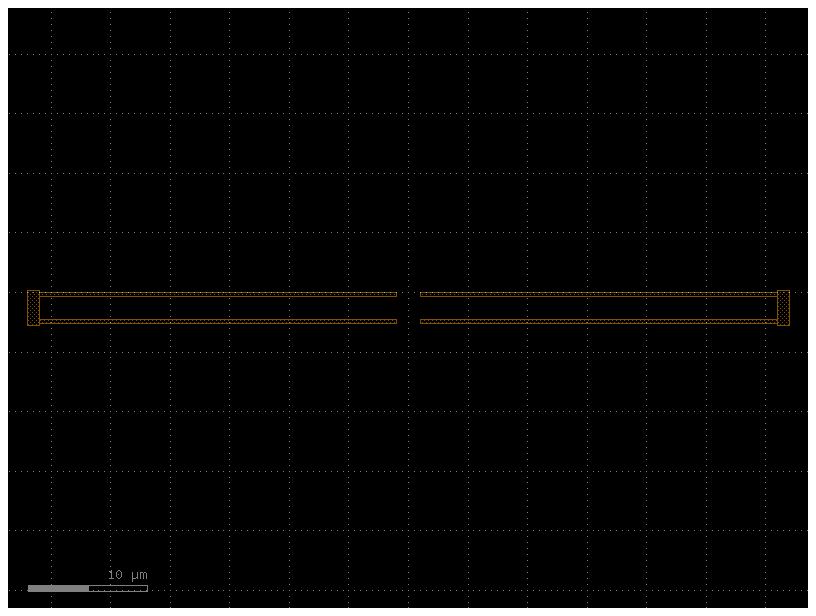

In [ ]:
l_s = 30; w_s = 0.3; g_s = 2
l_sa = 2; l_c = 3; w_c = 1

spring_pair_test = draw_spring_pair(l_s, w_s, g_s, l_sa, l_c, w_c)
spring_pair_test.plot()
spring_pair_test.show()
spring_pair_test.draw_ports()
#spring_pair_test.pprint_ports()

MEMS Anchor

rectangle with frames
rectangle pad on top

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_mems_anchor(length, height, hole_diameter_max, linewidth, over_top, over_bottom):
    
    mems_anchor = gf.Component()

    # Anchor Top polySi
    anchor_top_temp = gf.components.rectangle(size=(length+2*over_top, height+2*over_top), layer=layer_polySi_top)
    anchor_top = mems_anchor.add_ref(anchor_top_temp)
    anchor_top.dmovex(-length/2-over_top); anchor_top.dmovey(-height/2-over_top)

    # Anchor polySi framework
    anchor_frame_temp = draw_fixedanchor_smallhole(length, height, hole_diameter_max, linewidth)
    anchor_frame = mems_anchor.add_ref(anchor_frame_temp)

    # Anchor Bottom SOI
    anchor_bottom_temp = gf.components.rectangle(size=(length+2*over_bottom, height+2*over_bottom), layer=layer_Si_full)
    anchor_bottom = mems_anchor.add_ref(anchor_bottom_temp)
    anchor_bottom.dmovex(-length/2-over_bottom); anchor_bottom.dmovey(-height/2-over_bottom)

    return mems_anchor

@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_mems_anchor_cut(length, height, left_cut, top_cut, hole_diameter_max, linewidth, over_top, over_bottom):
    
    mems_anchor = gf.Component()

    # Anchor Top polySi
    anchor_top_temp = gf.Component()
    anchor_top_temp.add_polygon([(0, 0), (length+2*over_top, 0), (length+2*over_top, height+2*over_top), (left_cut, height+2*over_top), (0, height+2*over_top-top_cut)], layer=layer_polySi_top)
    anchor_top = mems_anchor.add_ref(anchor_top_temp)
    anchor_top.dmovex(-length/2-over_top); anchor_top.dmovey(-height/2-over_top)

    # Anchor polySi framework
    anchor_frame_temp = draw_fixedanchor_cut_smallhole(length, height, left_cut, top_cut, hole_diameter_max, linewidth)
    anchor_frame = mems_anchor.add_ref(anchor_frame_temp)

    # Anchor Bottom SOI
    anchor_bottom_temp = gf.Component()
    anchor_bottom_temp.add_polygon([(0, 0), (length+2*over_bottom, 0), (length+2*over_bottom, height+2*over_bottom), (left_cut, height+2*over_bottom), (0, height+2*over_bottom-top_cut)], layer=layer_Si_full)
    anchor_bottom = mems_anchor.add_ref(anchor_bottom_temp)
    anchor_bottom.dmovex(-length/2-over_bottom); anchor_bottom.dmovey(-height/2-over_bottom)

    return mems_anchor

Pad

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_mems_pad(length, height, hole_diameter_max, linewidth, over_top, over_bottom, over_metal):

    mems_pad = gf.Component()

    # Pad Top polySi
    pad_top_temp = gf.components.rectangle(size=(length+2*over_top, height+2*over_top), layer=layer_polySi_top)
    pad_top = mems_pad.add_ref(pad_top_temp)
    pad_top.dmovex(-length/2-over_top); pad_top.dmovey(-height/2-over_top)

    # Pad polySi framework
    pad_frame_temp = draw_fixedanchor_smallhole(length, height, hole_diameter_max, linewidth)
    pad_frame = mems_pad.add_ref(pad_frame_temp)

    # Pad Bottom SOI
    pad_bottom_temp = gf.components.rectangle(size=(length+2*over_bottom, height+2*over_bottom), layer=layer_Si_full)
    pad_bottom = mems_pad.add_ref(pad_bottom_temp)
    pad_bottom.dmovex(-length/2-over_bottom); pad_bottom.dmovey(-height/2-over_bottom)

    # Pad Top Metal
    pad_metal_temp = gf.components.rectangle(size=(length+2*over_top-2*over_metal, height+2*over_top-2*over_metal), layer=layer_metal)
    pad_metal = mems_pad.add_ref(pad_metal_temp)
    pad_metal.dmovex(-length/2-over_top+over_metal); pad_metal.dmovey(-height/2-over_top+over_metal)

    return mems_pad

Comb Drive

In [ ]:
#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_proofmass_side(length, height, hole_diameter, hole_gap, layer):
    
    d_r = hole_diameter; p_r = hole_diameter + hole_gap
    proof_full = gf.Component()

    # Proff Mass with Release Holes
    proof = gf.Component()
    proof_temp = gf.components.rectangle(size=(length, height), layer=layer)
    proof_ref = proof.add_ref(proof_temp)
    # proof_ref.dmovex(-length/2)
    proof_ref.dmovey(-height/2)
    
    # Release Hole Array
    hole_array = gf.Component()
    hole_temp = gf.components.rectangle(size=(d_r, d_r), layer=layer)
    n_hole_l = int(length/p_r)+2 # 向下取整，向上用math.ceil
    n_hole_h = int(height/p_r)

    hole_array_ref = {}

    for ii in range(n_hole_l):
        for jj in range(n_hole_h):
            hole_array_ref[ii*n_hole_l+jj] = hole_array.add_ref(hole_temp)
            hole_array_ref[ii*n_hole_l+jj].dmovex(ii*p_r); hole_array_ref[ii*n_hole_l+jj].dmovey(-d_r/2 - p_r*(n_hole_h-1)/2 + jj*p_r)
    
    # Create Release Holes on Proof Mass (Boolean Operation)
    operation = "not"
    proof_with_hole_temp = gf.boolean(proof, hole_array, operation=operation, layer = layer)
    proof_with_hole = proof_full.add_ref(proof_with_hole_temp)

    #proof_full.add_port(
    #    name="o_top", center=[0, 0], width=0, orientation=180, layer=layer_alignment
    #)
    #proof_full.add_port(
    #    name="o_bottom", center=[0, 0], width=0, orientation=0, layer=layer_alignment
    #)

    return proof_full

@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_finger_pair(finger_length, finger_width, finger_gap, finger_distance, num_pair):
    
    l_f = finger_length; w_f = finger_width; g_f = finger_gap
    d_f = finger_distance; n_p = num_pair

    finger_pair = gf.Component()

    for ii in range(num_pair):

        # Left movable finger
        left_finger_move_temp = gf.components.rectangle(size=(w_f, l_f), layer=layer_polySi_move); left_finger_move = finger_pair.add_ref(left_finger_move_temp)
        left_finger_move.dmovex(ii * 2*(w_f+g_f))
        # Right fixed finger
        right_finger_fixed_temp = gf.components.rectangle(size=(w_f, l_f), layer=layer_polySi_fixed); right_finger_fixed = finger_pair.add_ref(right_finger_fixed_temp)
        right_finger_fixed.dmovex(ii*2*(w_f+g_f) + w_f + g_f); right_finger_fixed.dmovey(d_f)

    # Extra movable finger
    # Left movable finger
    extra_finger_move_temp = gf.components.rectangle(size=(w_f, l_f), layer=layer_polySi_move); extra_finger_move = finger_pair.add_ref(extra_finger_move_temp)
    extra_finger_move.dmovex(num_pair * 2*(w_f+g_f))
    
    return finger_pair



@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_comb_drive(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_gap_min, holder_top_over, holder_bottom_over):

    l_f = finger_length; w_f = finger_width; g_f = finger_gap
    d_f = finger_distance; n_p = num_pair
    l_ef = edge_fixed; d_fm = holder_distance; w_h = holder_linewidth
    w_hm = holder_width_move; w_hf = holder_width_fixed

    comb_drive = gf.Component()
    # Movable holder
    hole_diameter = w_hm - 2*w_h; length = n_p * 2*(w_f+g_f)+w_f + 2*l_ef + d_fm
    height = w_hm; hole_gap = w_h
    holder_move_temp = draw_proofmass_side(length, height, hole_diameter, hole_gap, layer_polySi_move); holder_move = comb_drive.add_ref(holder_move_temp)
    holder_move.dmovey(height/2)
    # Fingers
    fingers_temp = draw_finger_pair(l_f, w_f, g_f, d_f, n_p); fingers = comb_drive.add_ref(fingers_temp)
    fingers.dmovex(d_fm + l_ef); fingers.dmovey(w_hm)
    # Fixed holder
    l_hf = 2*n_p*(w_f+g_f)+0*w_f + 2*0*l_ef; w_hf = holder_width_fixed
    #holder_fixed_temp = gf.components.rectangle(size=(l_hf, w_hf), layer=layer_polySi_fixed); holder_fixed = comb_drive.add_ref(holder_fixed_temp)
    #holder_fixed.dmovex(d_fm); holder_fixed.dmovey(w_hm + l_f + d_f)
    holder_fixed_temp = draw_mems_anchor(l_hf, w_hf, holder_gap_min, holder_linewidth, holder_top_over, holder_bottom_over)
    holder_fixed = comb_drive.add_ref(holder_fixed_temp)
    holder_fixed.dmovex(l_hf/2 + d_fm + l_ef+w_f); holder_fixed.dmovey(w_hf/2 + w_hm + l_f + d_f)

    return comb_drive

@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_comb_drive_cut(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_fixed_leftcut, holder_fixed_topcut, holder_gap_min, holder_top_over, holder_bottom_over):

    l_f = finger_length; w_f = finger_width; g_f = finger_gap
    d_f = finger_distance; n_p = num_pair
    l_ef = edge_fixed; d_fm = holder_distance; w_h = holder_linewidth
    w_hm = holder_width_move; w_hf = holder_width_fixed

    comb_drive = gf.Component()
    # Movable holder
    hole_diameter = w_hm - 2*w_h; length = n_p * 2*(w_f+g_f)+w_f + 2*l_ef + d_fm
    height = w_hm; hole_gap = w_h
    holder_move_temp = draw_proofmass_side(length, height, hole_diameter, hole_gap, layer_polySi_move); holder_move = comb_drive.add_ref(holder_move_temp)
    holder_move.dmovey(height/2)
    # Fingers
    fingers_temp = draw_finger_pair(l_f, w_f, g_f, d_f, n_p); fingers = comb_drive.add_ref(fingers_temp)
    fingers.dmovex(d_fm + l_ef); fingers.dmovey(w_hm)
    # Fixed holder
    l_hf = 2*n_p*(w_f+g_f)+0*w_f + 2*0*l_ef; w_hf = holder_width_fixed
    #holder_fixed_temp = gf.components.rectangle(size=(l_hf, w_hf), layer=layer_polySi_fixed); holder_fixed = comb_drive.add_ref(holder_fixed_temp)
    #holder_fixed.dmovex(d_fm); holder_fixed.dmovey(w_hm + l_f + d_f)
    holder_fixed_temp = draw_mems_anchor_cut(l_hf, w_hf, holder_fixed_leftcut, holder_fixed_topcut, holder_gap_min, holder_linewidth, holder_top_over, holder_bottom_over)
    holder_fixed = comb_drive.add_ref(holder_fixed_temp)
    holder_fixed.mirror_x(); holder_fixed.dmovex(l_hf/2 + d_fm + l_ef+w_f); holder_fixed.dmovey(w_hf/2 + w_hm + l_f + d_f)

    return comb_drive

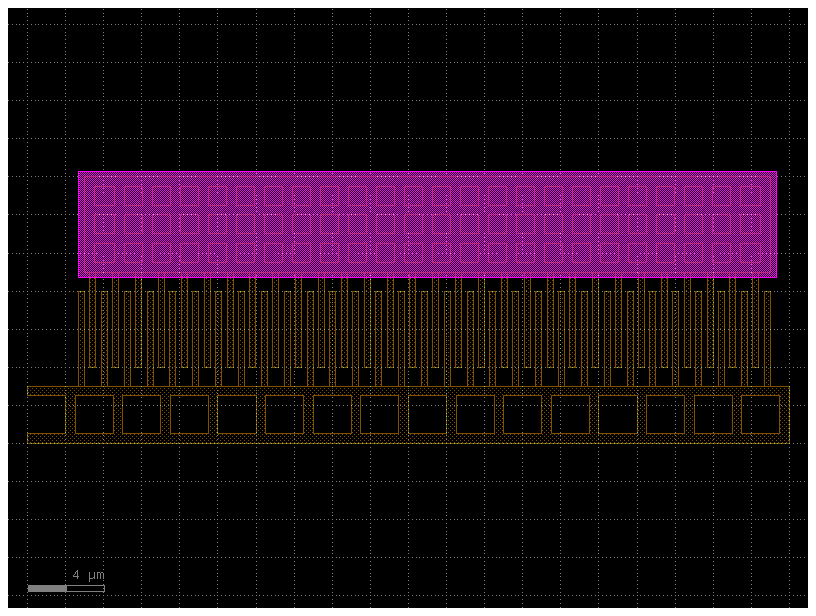

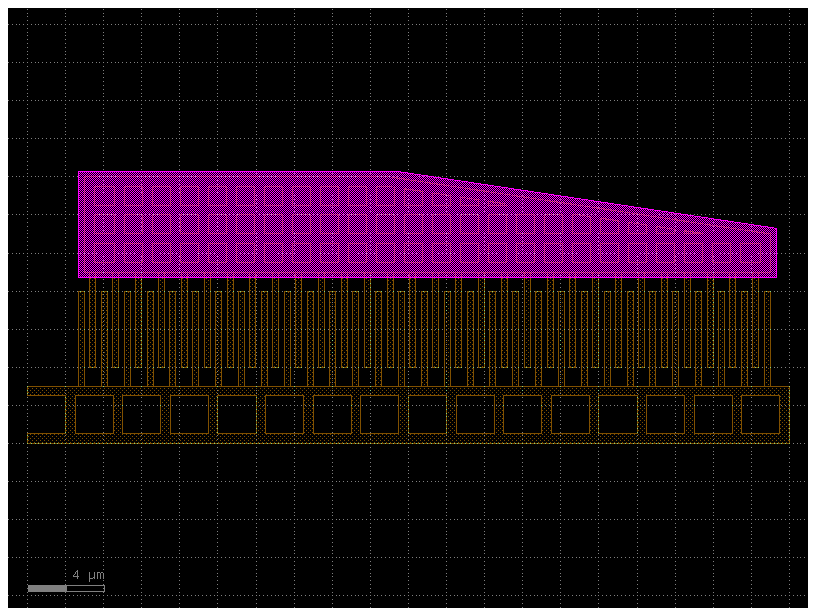

In [ ]:
finger_length = 5; finger_width = 0.3; finger_gap = 0.3
finger_distance = 1; num_pair = 30
edge_fixed = 1; holder_linewidth = 0.5
holder_width_move = 3; holder_width_fixed = 5
holder_gap_min = 1; holder_top_over = 0.3; holder_bottom_over = 0.3

L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L

comb_drive_test = draw_comb_drive(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_gap_min, holder_top_over, holder_bottom_over)
comb_drive_test.draw_ports()
comb_drive_test.plot()
comb_drive_test.show()
# comb_drive_test.pprint_ports()

holder_fixed_leftcut = 20;  holder_fixed_topcut = 3
comb_drive_test2 = draw_comb_drive_cut(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_fixed_leftcut, holder_fixed_topcut, holder_gap_min, holder_top_over, holder_bottom_over)
comb_drive_test2.draw_ports()
comb_drive_test2.plot()
comb_drive_test2.show()

Total Switch Part

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_switch_MEMS(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower,
                     pad_length_upper, pad_width_upper, pad_length_lower, pad_width_lower):

    switch_MEMS = gf.Component()
    # Proof mass
    proof_mass_temp = draw_proofmass(proof_length, proof_height, hole_diameter, hole_gap, layer_polySi_move); proof_mass = switch_MEMS.add_ref(proof_mass_temp)
    # Upper spring
    spring_temp = draw_spring_pair(spring_length, spring_width, spring_gap, proof_length, pad_length, pad_width); spring_upper = switch_MEMS.add_ref(spring_temp)
    spring_upper.dmirror_y(); spring_upper.dmovey(proof_height/2 -spring_width - spring_edge_upper)
    # Lower spring
    spring_lower = switch_MEMS.add_ref(spring_temp)
    spring_lower.dmovey(-proof_height/2 + spring_width + spring_edge_lower)
    # Comb drive
    comb_drive_temp = draw_comb_drive(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_gap_min, holder_top_over, holder_bottom_over)
    comb_drive_right = switch_MEMS.add_ref(comb_drive_temp)
    comb_drive_right.dmovex(proof_length/2); comb_drive_right.dmovey(-proof_height/2 + comb_edge_lower)
    comb_drive_left = switch_MEMS.add_ref(comb_drive_temp)
    comb_drive_left.dmirror_x(); comb_drive_left.dmovex(-proof_length/2); comb_drive_left.dmovey(-proof_height/2 + comb_edge_lower)

    # Upper Anchor
    #anchor_upper_temp = gf.components.rectangle(size=(proof_length, anchor_width_upper), layer=layer_polySi_fixed); anchor_upper = switch_MEMS.add_ref(anchor_upper_temp)
    #anchor_upper.dmovex(-proof_length/2); anchor_upper.dmovey(proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper)
    #pad_upper_temp = gf.components.rectangle(size=(pad_length_upper, pad_width_upper), layer=layer_polySi_fixed); pad_upper = switch_MEMS.add_ref(pad_upper_temp)
    #pad_upper.dmovex(-pad_length_upper/2); pad_upper.dmovey(proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper + anchor_width_upper)
    anchor_upper_temp = draw_mems_anchor(proof_length, anchor_width_upper+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, holder_bottom_over); anchor_upper = switch_MEMS.add_ref(anchor_upper_temp)
    anchor_upper.dmovey(anchor_width_upper/2 + proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper)
    pad_upper_temp = draw_mems_anchor(pad_length_upper, pad_width_upper, holder_gap_min, holder_linewidth, holder_top_over, holder_bottom_over); pad_upper = switch_MEMS.add_ref(pad_upper_temp)
    pad_upper.dmovey(pad_width_upper/2 - holder_linewidth/2 + proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper + anchor_width_upper)
    # Lower Anchor
    #anchor_lower_temp = gf.components.rectangle(size=(proof_length, anchor_width_lower), layer=layer_polySi_fixed); anchor_lower = switch_MEMS.add_ref(anchor_lower_temp)
    #anchor_lower.dmirror_y(); anchor_lower.dmovex(-proof_length/2); anchor_lower.dmovey(-proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower)
    #pad_lower_temp = gf.components.rectangle(size=(pad_length_lower, pad_width_lower), layer=layer_polySi_fixed); pad_lower = switch_MEMS.add_ref(pad_lower_temp)
    #pad_lower.dmirror_y(); pad_lower.dmovex(-pad_length_lower/2); pad_lower.dmovey(-proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower - anchor_width_lower)
    anchor_lower_temp = draw_mems_anchor(proof_length, anchor_width_lower+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, holder_bottom_over); anchor_lower = switch_MEMS.add_ref(anchor_lower_temp)
    anchor_lower.dmovey(-anchor_width_lower/2 - proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower)
    pad_lower_temp = draw_mems_anchor(pad_length_lower, pad_width_lower, holder_gap_min, holder_linewidth, holder_top_over, holder_bottom_over); pad_lower = switch_MEMS.add_ref(pad_lower_temp)
    pad_lower.dmovey(-pad_width_lower/2 + holder_linewidth/2 - proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower - anchor_width_lower)

    return switch_MEMS


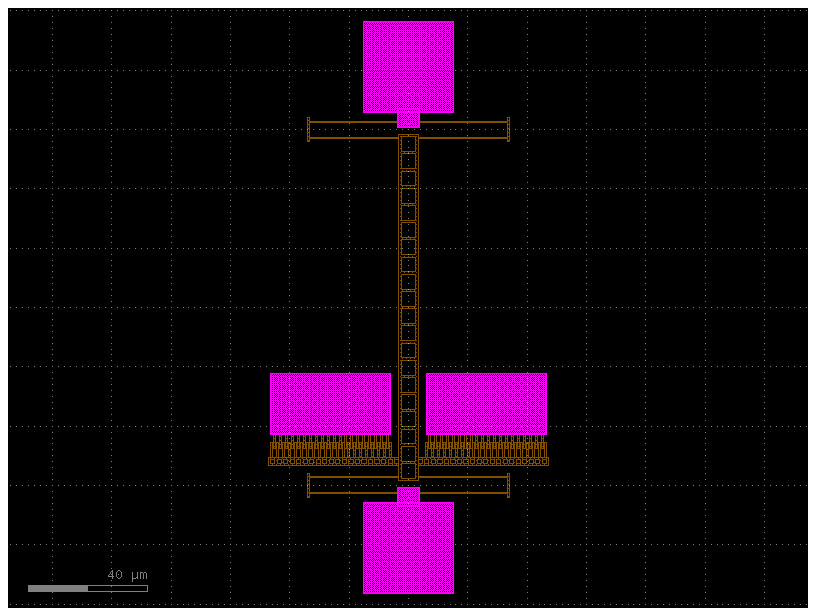

In [ ]:
proof_length = 7; proof_height = 120
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 5; finger_width = 0.5; finger_gap = 0.5
finger_distance = 3; num_pair = 20
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 20
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.3
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L; # holder_distance = 2

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 5
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5
pad_length_upper = 30; pad_width_upper = 30; pad_length_lower = 30; pad_width_lower = 30

switch_MEMS_test = draw_switch_MEMS(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower,
                     pad_length_upper, pad_width_upper, pad_length_lower, pad_width_lower)
switch_MEMS_test.plot()
switch_MEMS_test.show()

MEMS (Different Anchor)

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_switch_MEMS2(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over):

    switch_MEMS = gf.Component()
    # Proof mass
    proof_mass_temp = draw_proofmass(proof_length, proof_height, hole_diameter, hole_gap, layer_polySi_move); proof_mass = switch_MEMS.add_ref(proof_mass_temp)
    # Upper spring
    spring_temp = draw_spring_pair(spring_length, spring_width, spring_gap, proof_length, pad_length, pad_width); spring_upper = switch_MEMS.add_ref(spring_temp)
    spring_upper.dmirror_y(); spring_upper.dmovey(proof_height/2 -spring_width - spring_edge_upper)
    # Lower spring
    spring_lower = switch_MEMS.add_ref(spring_temp)
    spring_lower.dmovey(-proof_height/2 + spring_width + spring_edge_lower)
    # Comb drive
    comb_drive_temp = draw_comb_drive(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_gap_min, holder_top_over, holder_bottom_over)
    comb_drive_right = switch_MEMS.add_ref(comb_drive_temp)
    comb_drive_right.dmovex(proof_length/2); comb_drive_right.dmovey(-proof_height/2 + comb_edge_lower)
    comb_drive_left = switch_MEMS.add_ref(comb_drive_temp)
    comb_drive_left.dmirror_x(); comb_drive_left.dmovex(-proof_length/2); comb_drive_left.dmovey(-proof_height/2 + comb_edge_lower)

    # Upper Anchor
    anchor_upper_temp = draw_mems_anchor(proof_length, anchor_width_upper+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, anchor_SOI_over); anchor_upper = switch_MEMS.add_ref(anchor_upper_temp)
    anchor_upper.dmovey(anchor_width_upper/2 + proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper)
    # Lower Anchor
    anchor_lower_temp = draw_mems_anchor(proof_length, anchor_width_lower+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, anchor_SOI_over); anchor_lower = switch_MEMS.add_ref(anchor_lower_temp)
    anchor_lower.dmovey(-anchor_width_lower/2 - proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower)
    
    return switch_MEMS


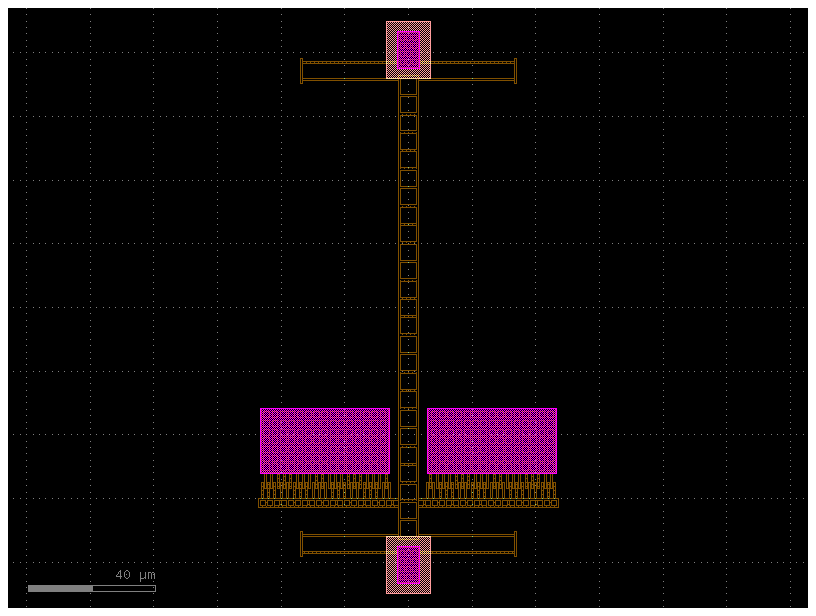

In [ ]:
proof_length = 7; proof_height = 150
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 5; finger_width = 0.5; finger_gap = 0.5
finger_distance = 3; num_pair = 20
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 20
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.3
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L; # holder_distance = 2

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 10
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 10; anchor_width_lower = 10; anchor_SOI_over = 3.5
pad_length_upper = 30; pad_width_upper = 30; pad_length_lower = 30; pad_width_lower = 30

switch_MEMS_test2 = draw_switch_MEMS2(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)
switch_MEMS_test2.plot()
switch_MEMS_test2.show()

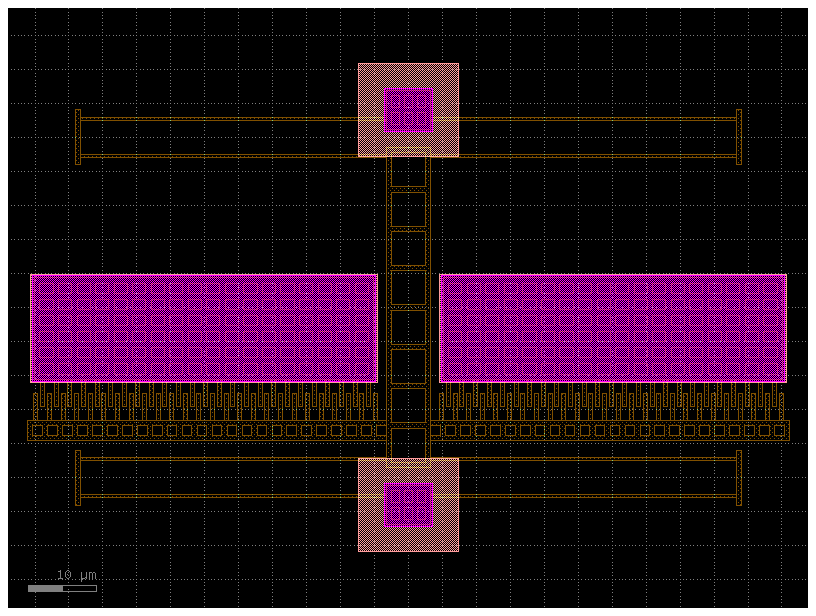

In [ ]:
proof_length = 7; proof_height = 50
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 45; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2; num_pair = 25
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 15
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.5
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = (N+0)*W - L; # holder_distance = 1

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 4
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4

switch_MEMS_test2 = draw_switch_MEMS2(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)
switch_MEMS_test2.plot()
switch_MEMS_test2.show()

Comb Drive with multi comb groups

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_switch_MEMS3(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over):

    switch_MEMS = gf.Component()
    # Proof mass
    proof_mass_temp = draw_proofmass(proof_length, proof_height, hole_diameter, hole_gap, layer_polySi_move); proof_mass = switch_MEMS.add_ref(proof_mass_temp)
    # Upper spring
    spring_temp = draw_spring_pair(spring_length, spring_width, spring_gap, proof_length, pad_length, pad_width); spring_upper = switch_MEMS.add_ref(spring_temp)
    spring_upper.dmirror_y(); spring_upper.dmovey(proof_height/2 -spring_width - spring_edge_upper)
    # Lower spring
    spring_lower = switch_MEMS.add_ref(spring_temp)
    spring_lower.dmovey(-proof_height/2 + spring_width + spring_edge_lower)
    # Comb drive
    comb_drive_temp = {}; comb_drive_right = {}; comb_drive_left = {}
    for ii in range(num_combs):
        num_pair = num_pair_array[ii]; edge_fixed = edge_fixed_array[ii]
        holder_distance = holder_distance_array[ii]; holder_width_move = holder_width_move_array[ii]; holder_width_fixed = holder_width_fixed_array[ii]
        holder_top_over = holder_top_over_array[ii]; holder_bottom_over = holder_bottom_over_array[ii]
        comb_edge_lower = comb_edge_lower_array[ii]
        comb_drive_temp[ii] = draw_comb_drive(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_gap_min, holder_top_over, holder_bottom_over)
        comb_drive_right[ii] = switch_MEMS.add_ref(comb_drive_temp[ii])
        comb_drive_right[ii].dmovex(proof_length/2); comb_drive_right[ii].dmovey(-proof_height/2 + comb_edge_lower)
        comb_drive_left[ii] = switch_MEMS.add_ref(comb_drive_temp[ii])
        comb_drive_left[ii].dmirror_x(); comb_drive_left[ii].dmovex(-proof_length/2); comb_drive_left[ii].dmovey(-proof_height/2 + comb_edge_lower)

    # Upper Anchor
    anchor_upper_temp = draw_mems_anchor(proof_length, anchor_width_upper+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, anchor_SOI_over); anchor_upper = switch_MEMS.add_ref(anchor_upper_temp)
    anchor_upper.dmovey(anchor_width_upper/2 + proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper)
    # Lower Anchor
    anchor_lower_temp = draw_mems_anchor(proof_length, anchor_width_lower+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, anchor_SOI_over); anchor_lower = switch_MEMS.add_ref(anchor_lower_temp)
    anchor_lower.dmovey(-anchor_width_lower/2 - proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower)
    
    return switch_MEMS


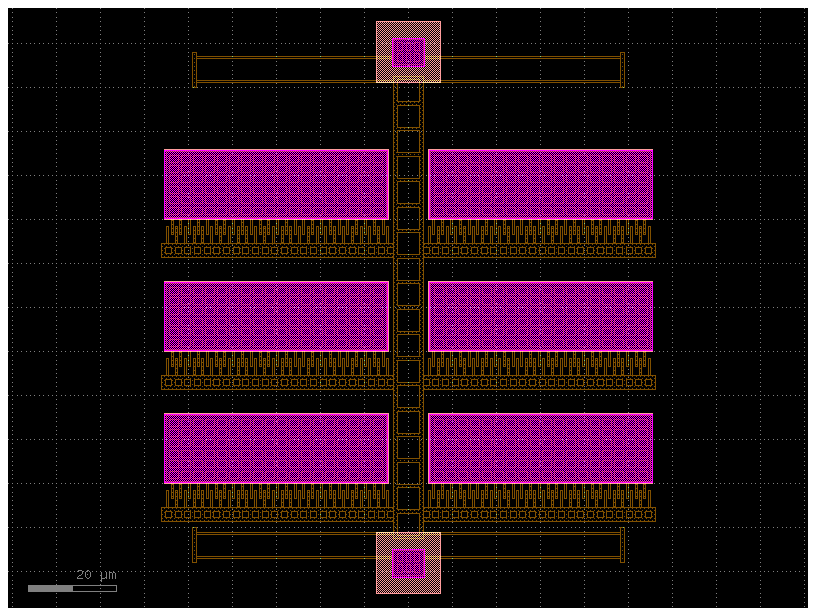

In [ ]:
proof_length = 7; proof_height = 110
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 45; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

num_combs = 3
finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2; num_pair_array = [25, 25, 25]
edge_fixed_array = [1, 1, 1]; holder_linewidth = 0.8
holder_width_move_array = [3, 3, 3]; holder_width_fixed_array = [15, 15, 15]
holder_gap_min = 2; holder_top_over_array = [0.3, 0.3, 0.3]; holder_bottom_over_array = [0.5, 0.5, 0.5]
holder_distance_array = [0, 0, 0]
for ii in range(num_combs):
    L = num_pair_array[ii]*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed_array[ii]; W = holder_width_move_array[ii] - holder_linewidth
    N = math.ceil(L/W); holder_distance_array[ii] = (N+0)*W - L; # holder_distance = 1

spring_edge_upper = spring_edge_lower = 1
comb_edge_lower_array = [4, 34, 64]
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4

switch_MEMS_test2 = draw_switch_MEMS3(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)
switch_MEMS_test2.plot()
switch_MEMS_test2.show()

Multiple groups + different shapes

In [ ]:
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_switch_MEMS3_cut(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_fixed_leftcut_array, holder_fixed_topcut_array, shape_code_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over):

    switch_MEMS = gf.Component()
    # Proof mass
    proof_mass_temp = draw_proofmass(proof_length, proof_height, hole_diameter, hole_gap); proof_mass = switch_MEMS.add_ref(proof_mass_temp)
    # Upper spring
    spring_temp = draw_spring_pair(spring_length, spring_width, spring_gap, proof_length, pad_length, pad_width); spring_upper = switch_MEMS.add_ref(spring_temp)
    spring_upper.dmirror_y(); spring_upper.dmovey(proof_height/2 -spring_width - spring_edge_upper)
    # Lower spring
    spring_lower = switch_MEMS.add_ref(spring_temp)
    spring_lower.dmovey(-proof_height/2 + spring_width + spring_edge_lower)
    # Comb drive
    comb_drive_temp = {}; comb_drive_right = {}; comb_drive_left = {}
    for ii in range(num_combs):
        num_pair = num_pair_array[ii]; edge_fixed = edge_fixed_array[ii]
        holder_distance = holder_distance_array[ii]; holder_width_move = holder_width_move_array[ii]; holder_width_fixed = holder_width_fixed_array[ii]
        holder_top_over = holder_top_over_array[ii]; holder_bottom_over = holder_bottom_over_array[ii]
        comb_edge_lower = comb_edge_lower_array[ii]
        shape_code = shape_code_array[ii] # 0 normal, 1 with cut
        holder_fixed_leftcut = holder_fixed_leftcut_array[ii]; holder_fixed_topcut = holder_fixed_topcut_array[ii]

        if shape_code == 0:
            comb_drive_temp[ii] = draw_comb_drive(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_gap_min, holder_top_over, holder_bottom_over)
            comb_drive_right[ii] = switch_MEMS.add_ref(comb_drive_temp[ii])
            comb_drive_right[ii].dmovex(proof_length/2); comb_drive_right[ii].dmovey(-proof_height/2 + comb_edge_lower)
            comb_drive_left[ii] = switch_MEMS.add_ref(comb_drive_temp[ii])
            comb_drive_left[ii].dmirror_x(); comb_drive_left[ii].dmovex(-proof_length/2); comb_drive_left[ii].dmovey(-proof_height/2 + comb_edge_lower)
        
        if shape_code == 1:
            comb_drive_temp[ii] = draw_comb_drive_cut(finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed, holder_distance, holder_linewidth, holder_width_move, holder_width_fixed, holder_fixed_leftcut, holder_fixed_topcut, holder_gap_min, holder_top_over, holder_bottom_over)
            comb_drive_right[ii] = switch_MEMS.add_ref(comb_drive_temp[ii])
            comb_drive_right[ii].dmovex(proof_length/2); comb_drive_right[ii].dmovey(-proof_height/2 + comb_edge_lower)
            comb_drive_left[ii] = switch_MEMS.add_ref(comb_drive_temp[ii])
            comb_drive_left[ii].dmirror_x(); comb_drive_left[ii].dmovex(-proof_length/2); comb_drive_left[ii].dmovey(-proof_height/2 + comb_edge_lower)

    # Upper Anchor
    anchor_upper_temp = draw_mems_anchor(proof_length, anchor_width_upper+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, anchor_SOI_over); anchor_upper = switch_MEMS.add_ref(anchor_upper_temp)
    anchor_upper.dmovey(anchor_width_upper/2 + proof_height/2 - spring_edge_upper + spring_gap - anchor_edge_upper)
    # Lower Anchor
    anchor_lower_temp = draw_mems_anchor(proof_length, anchor_width_lower+holder_linewidth, holder_gap_min, holder_linewidth, holder_top_over, anchor_SOI_over); anchor_lower = switch_MEMS.add_ref(anchor_lower_temp)
    anchor_lower.dmovey(-anchor_width_lower/2 - proof_height/2 + spring_edge_lower - spring_gap + anchor_edge_lower)
    
    return switch_MEMS


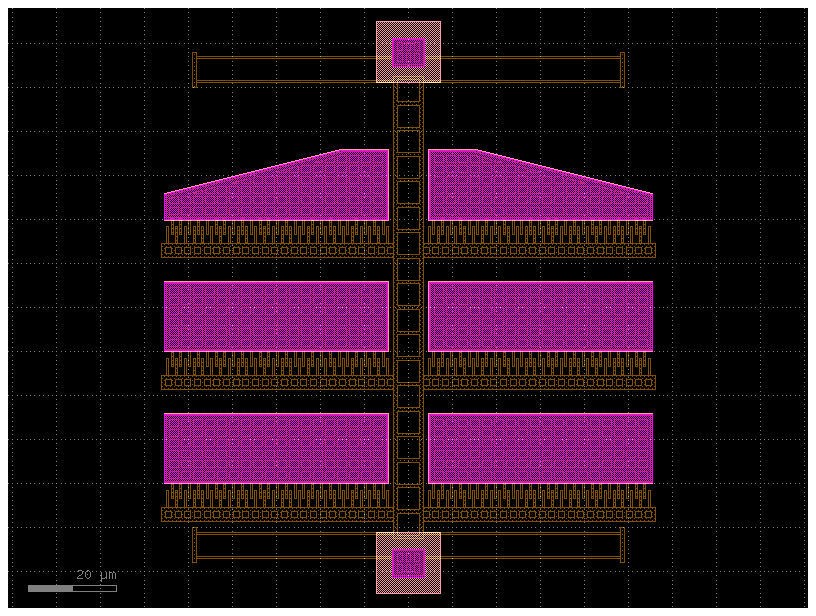

In [ ]:
proof_length = 7; proof_height = 110
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 45; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

num_combs = 3
shape_code_array = [0, 0, 1]
finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2; num_pair_array = [25, 25, 25]
edge_fixed_array = [1, 1, 1]; holder_linewidth = 0.8
holder_width_move_array = [3, 3, 3]; holder_width_fixed_array = [15, 15, 15]
holder_fixed_leftcut_array = [0, 0, 40]; holder_fixed_topcut_array = [0, 0, 10]
holder_gap_min = 2; holder_top_over_array = [0.3, 0.3, 0.3]; holder_bottom_over_array = [0.5, 0.5, 0.5]
holder_distance_array = [0, 0, 0]
for ii in range(num_combs):
    L = num_pair_array[ii]*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed_array[ii]; W = holder_width_move_array[ii] - holder_linewidth
    N = math.ceil(L/W); holder_distance_array[ii] = (N+0)*W - L; # holder_distance = 1

spring_edge_upper = spring_edge_lower = 1
comb_edge_lower_array = [4, 34, 64]
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4

switch_MEMS_test2 = draw_switch_MEMS3_cut(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_fixed_leftcut_array, holder_fixed_topcut_array, shape_code_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)
switch_MEMS_test2.plot()
switch_MEMS_test2.show()

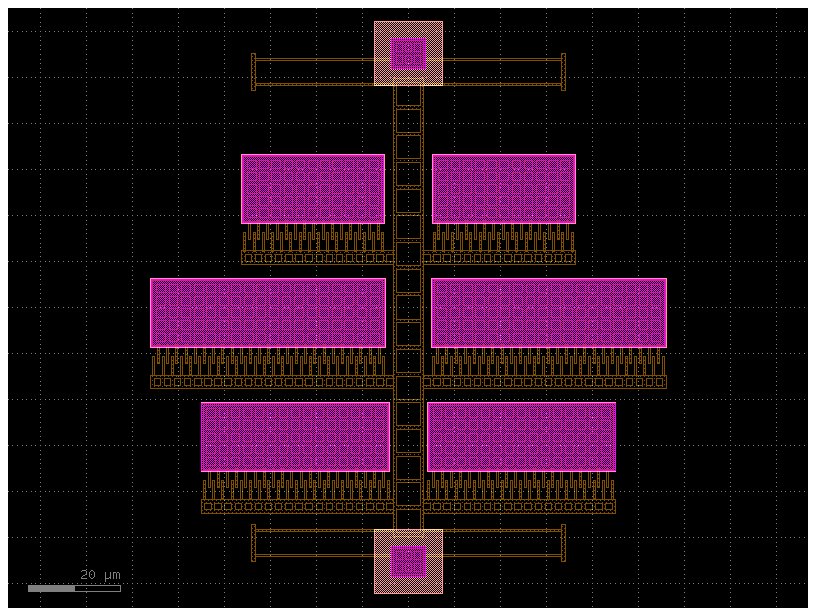

In [ ]:
proof_length = 7; proof_height = 100
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

num_combs = 3
finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2.5; num_pair_array = [20, 25, 15]
edge_fixed_array = [0.5, 0.5, 0.5]; holder_linewidth = 0.8
holder_width_move_array = [3, 3, 3]; holder_width_fixed_array = [14, 14, 14]
holder_gap_min = 2; holder_top_over_array = [0.3, 0.3, 0.3, 0.3]; holder_bottom_over_array = [0.5, 0.5, 0.5]
holder_distance_array = [0, 0, 0]
for ii in range(num_combs):
    L = num_pair_array[ii]*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed_array[ii]; W = holder_width_move_array[ii] - holder_linewidth
    N = math.ceil(L/W); holder_distance_array[ii] = (N+0)*W - L; # holder_distance = 1

spring_edge_upper = spring_edge_lower = 1
d = 27; x0 = 5; comb_edge_lower_array = [x0, x0+d, x0+2*d, x0+3*d]
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4

switch_MEMS_test2 = draw_switch_MEMS3(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)
switch_MEMS_test2.plot()
switch_MEMS_test2.show()

Total Setup

Waveguide Cross + MEMS Switch

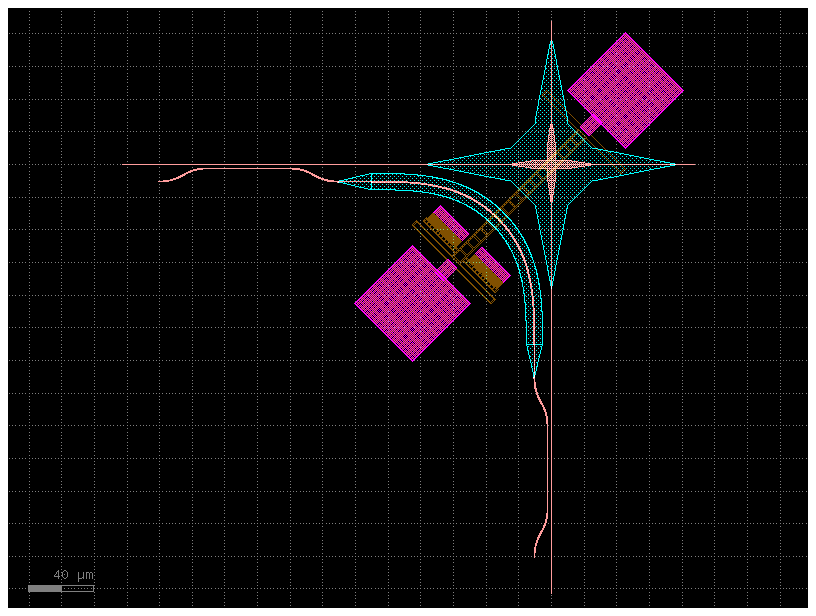

In [ ]:
setup = gf.Component()

w0 = 0.45
w_s1 = 0.45
w_c = 5
l_s1 = 0
l_t1 = 50
l_s2 = 1
l_t2 = 15
l_c = 20
w0_slab = 5*0+0.45
w_s1_slab = 20

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

proof_length = 7; proof_height = 110
hole_diameter = 5; hole_gap = 1

spring_length = 30; spring_width = 0.3
spring_gap = 3; pad_length = 4; pad_width = 0.5

finger_length = 5; finger_width = 0.3; finger_gap = 0.3
finger_distance = 1; num_pair = 20
edge_fixed = 1; holder_linewidth = 0.5
holder_width_move = 3; holder_width_fixed = 5
holder_gap_min = 1; holder_top_over = 0.3; holder_bottom_over = 0.3
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L

spring_edge_upper = spring_edge_lower = 0.2; comb_edge_lower = 3
anchor_edge_upper = anchor_edge_lower = 0.2
anchor_length_upper = anchor_length_lower = 0.2
anchor_width_upper = 10; anchor_width_lower = 10
pad_length_upper = 50; pad_width_upper = 50; pad_length_lower = 50; pad_width_lower = 50

switch_MEMS_temp = draw_switch_MEMS(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower,
                     pad_length_upper, pad_width_upper, pad_length_lower, pad_width_lower)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-20); switch_MEMS.dmovey(-20)

coupling_gap = 2
input_width = 0.4; output_width = 0.5; coupling_length = 50
bend_length = 30; extra_gap = 8
slab_width_half = 5; slab_taper_length = 20
turn_radius = 100

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius)
coupler_bend = setup.add_ref(coupler_bend_temp)
coupler_bend.dmovey(-w0/2 - coupling_gap)
coupler_bend.dmovex(-x1-y1 - w0/2 - coupling_gap)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)

setup.plot()
setup.show()

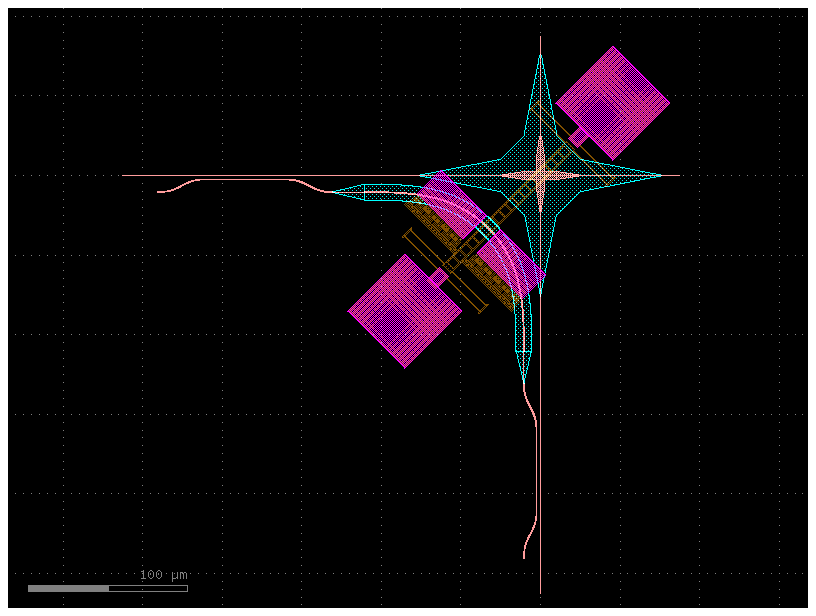

In [ ]:
setup = gf.Component()

w0 = 0.45
w_s1 = 0.45
w_c = 5
l_s1 = 0
l_t1 = 50
l_s2 = 1
l_t2 = 15
l_c = 20
w0_slab = 5*0+0.45
w_s1_slab = 20

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

proof_length = 7; proof_height = 110
hole_diameter = 5; hole_gap = 0.8

spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 5; finger_width = 0.5; finger_gap = 0.5
finger_distance = 3; num_pair = 20
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 20
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.3
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 10
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 10; anchor_width_lower = 10
pad_length_upper = 50; pad_width_upper = 50; pad_length_lower = 50; pad_width_lower = 50

switch_MEMS_temp = draw_switch_MEMS(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower,
                     pad_length_upper, pad_width_upper, pad_length_lower, pad_width_lower)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-20); switch_MEMS.dmovey(-20)

coupling_gap = 2
input_width = 0.4; output_width = 0.5; coupling_length = 50
bend_length = 30; extra_gap = 8
slab_width_half = 5; slab_taper_length = 20
turn_radius = 100

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full(input_width, output_width, coupling_length, bend_length, extra_gap, slab_width_half, slab_taper_length, turn_radius)
coupler_bend = setup.add_ref(coupler_bend_temp)
coupler_bend.dmovey(-w0/2 - coupling_gap)
coupler_bend.dmovex(-x1-y1 - w0/2 - coupling_gap)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)

setup.plot()
setup.show()

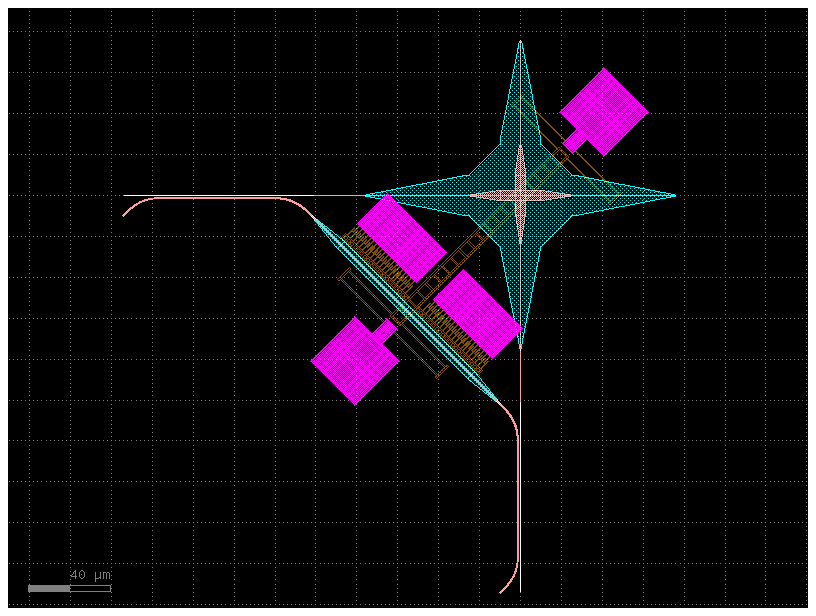

In [ ]:
setup = gf.Component()

w0 = 0.45
w_s1 = 0.45
w_c = 5
l_s1 = 0
l_t1 = 50
l_s2 = 1
l_t2 = 15
l_c = 20
w0_slab = 5*0+0.45
w_s1_slab = 20

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

proof_length = 7; proof_height = 120
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 5; finger_width = 0.5; finger_gap = 0.5
finger_distance = 3; num_pair = 20
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 20
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.3
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L; #holder_distance = 10

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 10
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 10; anchor_width_lower = 10
pad_length_upper = 30; pad_width_upper = 30; pad_length_lower = 30; pad_width_lower = 30

switch_MEMS_temp = draw_switch_MEMS(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower,
                     pad_length_upper, pad_width_upper, pad_length_lower, pad_width_lower)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-20); switch_MEMS.dmovey(-20)

input_width0 = 0.4; output_width0 = 0.4; 
input_width = 0.4; output_width = 0.5; coupling_length = 50
bend_length = 30; dc_gap = 0.1; extra_gap = 1
slab_width_full = 5; slab_width_half = 0; slab_taper_length = 20
turn_length = 45; turn_radius = 30

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length)
coupler_bend = setup.add_ref(coupler_bend_temp)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)

setup.plot()
setup.show()

Version (DC, no taper)

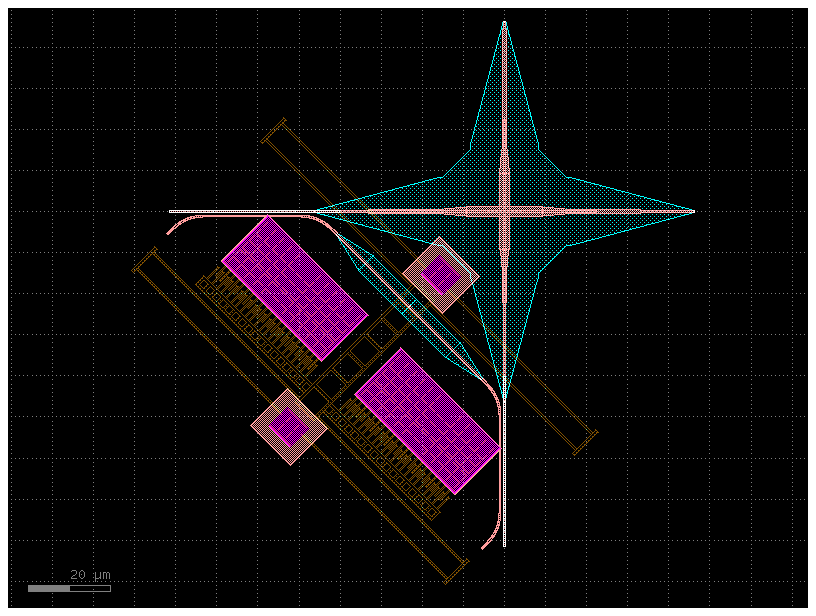

In [ ]:
setup = gf.Component()

w0 = 0.45
w_s1 = 1.1
w_c = 2.2
l_s1 = 0
l_t1 = 30 #l_t1 = 10*0+30
l_s2 = 1
l_t2 = 6
l_c = 18.5
w0_slab = 5*0+0.45
w_s1_slab = 16+0.45

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

proof_length = 7; proof_height = 45
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 50; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 4; finger_width = 0.4; finger_gap = 0.4
finger_distance = 2; num_pair = 21
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 15
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.5
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = N*W - L; # holder_distance = 2

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 3
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 3.5
pad_length_upper = 5; pad_width_upper = 5; pad_length_lower = 10; pad_width_lower = 10

switch_MEMS_temp = draw_switch_MEMS2(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-34); switch_MEMS.dmovey(-34)

input_width0 = 0.45; output_width0 = 0.45; 
input_width = 0.45; output_width = 0.45; coupling_length = 20
bend_length = 10; dc_gap = 0.135; extra_gap = 0.7
slab_width_full = 5; slab_width_half = 0; slab_taper_length = 10
turn_length = 15; turn_radius = 15

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length)
coupler_bend = setup.add_ref(coupler_bend_temp)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)

setup.plot()
setup.show()

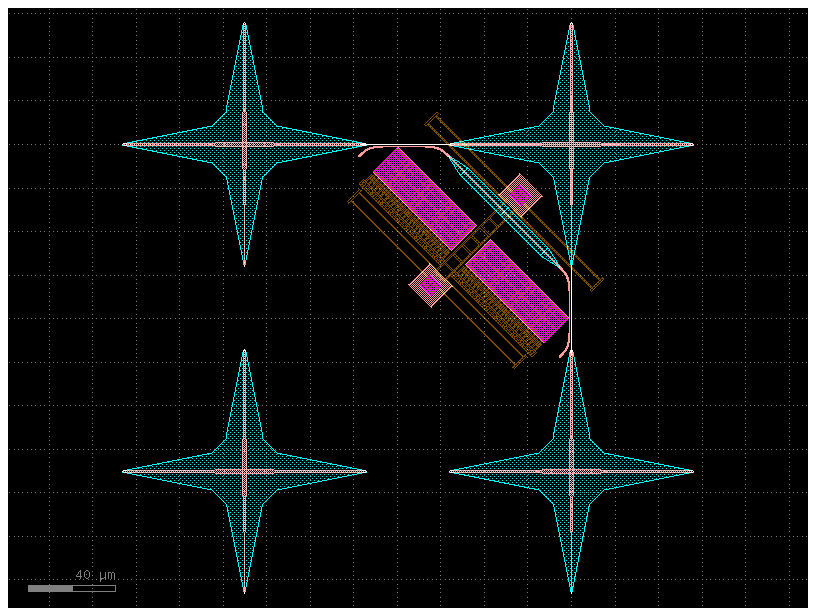

In [ ]:
setup = gf.Component()

w0 = 0.45
w_s1 = 1.1
w_c = 2.2
l_s1 = 0
l_t1 = 40 #l_t1 = 10*0+30
l_s2 = 1
l_t2 = 6
l_c = 18.5
w0_slab = 5*0+0.45
w_s1_slab = 16+0.45

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

proof_length = 7; proof_height = 50
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 50; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2; num_pair = 25
edge_fixed = 1; holder_linewidth = 0.8
holder_width_move = 3; holder_width_fixed = 15
holder_gap_min = 2; holder_top_over = 0.3; holder_bottom_over = 0.5
L = num_pair*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed; W = holder_width_move - holder_linewidth
N = math.ceil(L/W); holder_distance = (N+0)*W - L; # holder_distance = 1

spring_edge_upper = spring_edge_lower = 1; comb_edge_lower = 4
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4

switch_MEMS_temp = draw_switch_MEMS2(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair, edge_fixed,
                     holder_distance, holder_linewidth, holder_width_move, holder_width_fixed,
                     holder_gap_min, holder_top_over, holder_bottom_over,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-44); switch_MEMS.dmovey(-44)

input_width0 = 0.45; output_width0 = 0.45; 
input_width = 0.45; output_width = 0.45; coupling_length = 20
bend_length = 10; dc_gap = 0.135; extra_gap = 0.7
slab_width_full = 5; slab_width_half = 0; slab_taper_length = 10
turn_length = 26; turn_radius = 15

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length)
coupler_bend = setup.add_ref(coupler_bend_temp)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)


pitch = 150
WG_cross_left = setup.add_ref(WG_cross_temp)
WG_cross_down = setup.add_ref(WG_cross_temp)
WG_cross_diag = setup.add_ref(WG_cross_temp)
WG_cross_left.dmovex(-pitch); WG_cross_down.dmovey(-pitch)
WG_cross_diag.dmovex(-pitch); WG_cross_diag.dmovey(-pitch)


setup.plot()
setup.show()

3 Groups of Comb Drives

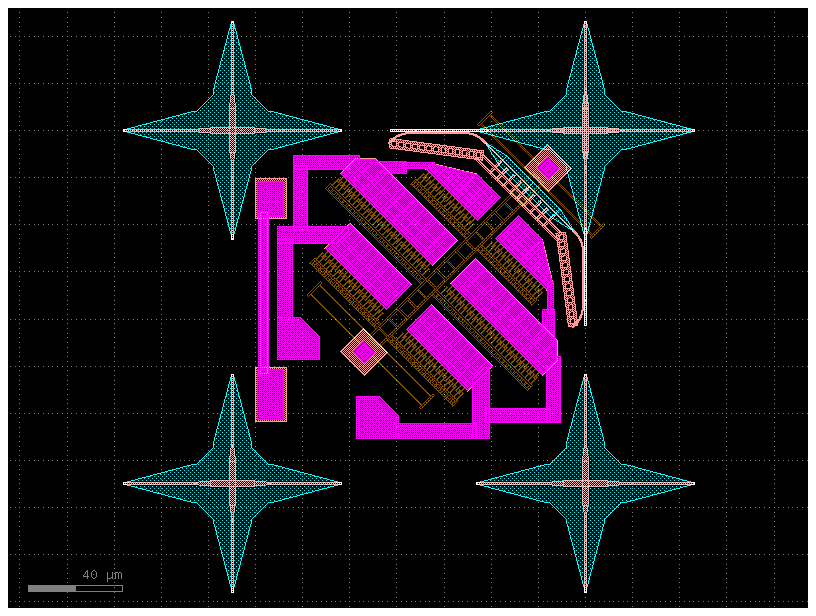

In [ ]:
setup = gf.Component()

## Waveguide Crossing
w0 = 0.45
w_s1 = 1.1
w_c = 2.2
l_s1 = 0
l_t1 = 30 #l_t1 = 10*0+30
l_s2 = 1
l_t2 = 6
l_c = 18.5
w0_slab = 5*0+0.45
w_s1_slab = 16+0.45

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

## MEMS
# Shuttle
proof_length = 7; proof_height = 100
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap
# Spring
spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8
# Comb
num_combs = 3
shape_code_array = [0, 1, 1]
finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2.5; num_pair_array = [18, 27, 15]
edge_fixed_array = [0.5, 0.5, 0.5]; holder_linewidth = 0.8
holder_width_move_array = [3, 3, 3]; holder_width_fixed_array = [14, 14, 13]
holder_fixed_leftcut_array = [0, 6, 17]; holder_fixed_topcut_array = [0, 6, 10.5]
holder_gap_min = 2; holder_top_over_array = [0.3, 0.3, 0.3, 0.3]; holder_bottom_over_array = [0.5, 0.5, 0.5]
holder_distance_array = [0, 0, 0]
for ii in range(num_combs):
    L = num_pair_array[ii]*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed_array[ii]; W = holder_width_move_array[ii] - holder_linewidth
    N = math.ceil(L/W); holder_distance_array[ii] = (N+0)*W - L; # holder_distance = 1
# Anchor
spring_edge_upper = spring_edge_lower = 1
d = 27; x0 = 5; comb_edge_lower_array = [x0, x0+d, x0+2*d, x0+3*d]
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4
# function
switch_MEMS_temp = draw_switch_MEMS3_cut(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_fixed_leftcut_array, holder_fixed_topcut_array, shape_code_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-55); switch_MEMS.dmovey(-55)

## Waveguide Bend
input_width0 = 0.45; output_width0 = 0.45; 
input_width = 0.45; output_width = 0.45; coupling_length = 20
bend_length = 10; dc_gap = 0.135; extra_gap = 0.7
slab_width_full = 5; slab_width_half = 0; slab_taper_length = 10
turn_length = 16; turn_radius = 15

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length)
coupler_bend = setup.add_ref(coupler_bend_temp)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)

## Electrical Interconnect
# Middle electrode
linewidth = 0.8; gap_min = 2
pad_mid_length = 50; ratio0 = 0.8; dmove0 = -105
over_top0 = 0.5; over_bottom0 = 0.5
 #pad_middle_temp = draw_mems_anchor_cut(pad_mid_length, pad_mid_length, pad_mid_length*ratio0, pad_mid_length*ratio0, gap_min, linewidth, over_top0, over_bottom0)
 #pad_middle = setup.add_ref(pad_middle_temp)
 #pad_middle.mirror_x(); pad_middle.dmovex(dmove0); pad_middle.dmovey(dmove0)
pad_mid_length_real = 16.5; pad_mid_cut = 8
over_top0 = 0.5; over_bottom0 = 0.5
pad_middle_temp = draw_mems_anchor_cut(pad_mid_length_real, pad_mid_length_real, pad_mid_cut, pad_mid_cut, gap_min, linewidth, over_top0, over_bottom0)
pad_middle_l = setup.add_ref(pad_middle_temp)
pad_middle_l.mirror_x(); pad_middle_l.dmovex(dmove0-pad_mid_length/2+pad_mid_length_real/2); pad_middle_l.dmovey(dmove0+pad_mid_length/2-pad_mid_length_real/2)
pad_middle_r = setup.add_ref(pad_middle_temp); pad_middle_r.trans = pad_middle_l.trans; pad_middle_r.drotate(90); pad_middle_r.mirror_x()
# Middle-to-Group3 Line
mid2g3_length = 34; mid2g3_width = 5
mid2g3_connect_temp = draw_mems_anchor(mid2g3_width, mid2g3_length, gap_min, linewidth, over_top0, over_bottom0)
mid2g3_connect_l = setup.add_ref(mid2g3_connect_temp)
mid2g3_connect_l.mirror_x(); mid2g3_connect_l.mirror_y(); mid2g3_connect_l.dmovex(dmove0-pad_mid_length/2+mid2g3_width/2); mid2g3_connect_l.dmovey(dmove0+pad_mid_length/2+mid2g3_length/2-linewidth)
mid2g3_connect_r = setup.add_ref(mid2g3_connect_temp)
mid2g3_connect_r.trans = mid2g3_connect_l.trans # 复制已有 instance 的完整变换
mid2g3_connect_r.drotate(90); mid2g3_connect_r.mirror_x() # 在此基础上叠加 y=x 镜像
# Group 3 electrode
pad_length_g3 = 29; pad_width_g3 = 6.5; lenth_meaure_g3 = 23.58; cut_g3 = pad_length_g3-lenth_meaure_g3  # 22.56 (43) 25.67 (46) 
pad_g3_temp = draw_mems_anchor_cut(pad_length_g3, pad_width_g3, cut_g3, cut_g3, gap_min, linewidth, over_top0, over_bottom0)
pad_g3_l = setup.add_ref(pad_g3_temp)
pad_g3_l.mirror_x(); pad_g3_l.mirror_y(); pad_g3_l.dmovex(dmove0-pad_mid_length/2+pad_length_g3/2); pad_g3_l.dmovey(dmove0+pad_mid_length/2+mid2g3_length+pad_width_g3/2-linewidth*2)
pad_g3_r = setup.add_ref(pad_g3_temp); pad_g3_r.trans = pad_g3_l.trans; pad_g3_r.drotate(90); pad_g3_r.dmirror_x()
# Group3-to-Group2 Line
g3g2_length = 26.5; g3g2_width = 5; g3g2_in = 6.5
g3g2_connect_temp = draw_mems_anchor(g3g2_width, g3g2_length, gap_min, linewidth, over_top0, over_bottom0)
g3g2_connect_l = setup.add_ref(g3g2_connect_temp)
g3g2_connect_l.mirror_x(); g3g2_connect_l.mirror_y(); g3g2_connect_l.dmovex(dmove0-pad_mid_length/2+g3g2_width/2+g3g2_in); g3g2_connect_l.dmovey(dmove0+pad_mid_length/2+mid2g3_length+pad_width_g3+g3g2_length/2-linewidth*3)
g3g2_connect_r = setup.add_ref(g3g2_connect_temp); g3g2_connect_r.trans = g3g2_connect_l.trans; g3g2_connect_r.drotate(90); g3g2_connect_r.dmirror_x()
# Group 2 electrode
pad_length_g2 = 33.4-g3g2_in; pad_width_g2 = 5; lenth_meaure_g2 = 30.08-g3g2_in; cut_g2 = pad_length_g2-lenth_meaure_g2
pad_g2_temp = draw_mems_anchor_cut(pad_length_g2, pad_width_g2, cut_g2, cut_g2, gap_min, linewidth, over_top0, over_bottom0)
pad_g2_l = setup.add_ref(pad_g2_temp)
pad_g2_l.mirror_x(); pad_g2_l.mirror_y(); pad_g2_l.dmovex(dmove0-pad_mid_length/2+pad_length_g2/2+g3g2_in); pad_g2_l.dmovey(dmove0+pad_mid_length/2+mid2g3_length+pad_width_g3+g3g2_length+pad_width_g2/2-linewidth*4)
pad_g2_r = setup.add_ref(pad_g2_temp); pad_g2_r.trans = pad_g2_l.trans; pad_g2_r.drotate(90); pad_g2_r.dmirror_x()
# Group2-to-Group1 Line
g2g1_width = 2.1; g2g1_width2 = 4
g1_dmovex = -77; g1_dmovey = -14.7
g2g1_length1_measure = 11.88; g2g1_length2_measure = 13.05
g2g1_connect1_temp = draw_mems_anchor_cut(g2g1_length1_measure, g2g1_width2, g2g1_width2-linewidth, g2g1_width2-linewidth, gap_min, linewidth, over_top0, over_bottom0)
g2g1_connect1_l = setup.add_ref(g2g1_connect1_temp)
g2g1_connect1_l.mirror_y(); g2g1_connect1_l.dmovex(g1_dmovex-g2g1_length1_measure/2+linewidth/2); g2g1_connect1_l.dmovey(g1_dmovey-g2g1_width2/2+g2g1_width/2)
g2g1_connect2_temp = draw_mems_anchor_cut(g2g1_length2_measure, g2g1_width, g2g1_width-linewidth*3/2, g2g1_width-linewidth*3/2, gap_min, linewidth, over_top0*0.4, over_bottom0*0.4)
g2g1_connect2_l = setup.add_ref(g2g1_connect2_temp)
g2g1_connect2_l.mirror_x(); g2g1_connect2_l.mirror_y(); g2g1_connect2_l.dmovex(g1_dmovex+g2g1_length2_measure/2-linewidth/2); g2g1_connect2_l.dmovey(g1_dmovey)
g2g1_connect1_r = setup.add_ref(g2g1_connect1_temp); g2g1_connect1_r.trans = g2g1_connect1_l.trans; g2g1_connect1_r.drotate(90); g2g1_connect1_r.dmirror_x()
g2g1_connect2_r = setup.add_ref(g2g1_connect2_temp); g2g1_connect2_r.trans = g2g1_connect2_l.trans; g2g1_connect2_r.drotate(90); g2g1_connect2_r.dmirror_x()

## MEMS-Waveguide Anchor
dc_frame_length = 42; dc_frame_height = 4
hole_diameter = 2; hole_gap = 1
dc_frame_dmovex = -83; dc_frame_dmovey = -5.4 # -4.8
dc_frame_length = int((dc_frame_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; dc_frame_height = int((dc_frame_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap
dc_frame_temp = draw_proofmass(dc_frame_length, dc_frame_height, hole_diameter, hole_gap, layer_Si_full)
dc_frame_l = setup.add_ref(dc_frame_temp)
dc_frame_l.dmovex(dc_frame_length/2); dc_frame_l.drotate(-7.5); dc_frame_l.dmovex(dc_frame_dmovex); dc_frame_l.dmovey(dc_frame_dmovey) # 9.5 dgree
dc_frame_r = setup.add_ref(dc_frame_temp)
dc_frame_r.dmovex(dc_frame_length/2); dc_frame_r.drotate(90+7.5); dc_frame_r.dmovey(dc_frame_dmovex); dc_frame_r.dmovex(dc_frame_dmovey)

WG_frame_length = 36; WG_frame_height = 10
hole_diameter = 3; hole_gap = 1
WG_frame_dmove = -27
WG_frame_length = int((WG_frame_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; WG_frame_height = int((WG_frame_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)-hole_gap
WG_frame_temp = draw_proofmass_side(WG_frame_height, WG_frame_length, hole_diameter, hole_gap, layer_Si_full)
WG_frame = setup.add_ref(WG_frame_temp)
WG_frame.dmovex(-WG_frame_height/2); WG_frame.drotate(45); WG_frame.dmovex(WG_frame_dmove); WG_frame.dmovey(WG_frame_dmove)
frame_extra2 = 14.3; frame_extra3 = 16.4
WG_frame2_temp = draw_straight(WG_frame_length+frame_extra2, hole_gap, layer_Si_full); WG_frame2 = setup.add_ref(WG_frame2_temp)
WG_frame2.dmovex(-(WG_frame_length+frame_extra2)/2); WG_frame2.drotate(-45); WG_frame2.dmovex(WG_frame_dmove); WG_frame2.dmovey(WG_frame_dmove)
WG_frame3_temp = draw_straight(WG_frame_length+frame_extra3, hole_gap, layer_Si_full); WG_frame3 = setup.add_ref(WG_frame3_temp)
WG_frame3.dmovex(-(WG_frame_length+frame_extra3)/2); WG_frame3.dmovey(-(WG_frame_height-hole_gap)/2); WG_frame3.drotate(-45); WG_frame3.dmovex(WG_frame_dmove); WG_frame3.dmovey(WG_frame_dmove)

# Interconnect Wire from other shells
# Top electrode
linewidth = 0.8; gap_min = 2
pad_top_length = 10; pad_top_width = 14
pad_top_dmovex = -133.5; pad_top_dmovey = -29
over_bottom1 = 1.5
pad_top_temp = draw_mems_anchor(pad_top_length, pad_top_width, gap_min, linewidth, over_top0, over_bottom1)
pad_top = setup.add_ref(pad_top_temp); pad_top.dmovex(pad_top_dmovex); pad_top.dmovey(pad_top_dmovey)
# Bottom electrode
pad_bottom_length = 10; pad_bottom_width = 20
pad_bottom_dmovex = -133.5; pad_bottom_dmovey = -112
pad_bottom_temp = draw_mems_anchor(pad_bottom_length, pad_bottom_width, gap_min, linewidth, over_top0, over_bottom1)
pad_bottom = setup.add_ref(pad_bottom_temp); pad_bottom.dmovex(pad_bottom_dmovex); pad_bottom.dmovey(pad_bottom_dmovey)
# Connecting wire
wire_width = 2.1; wire_dmovex = -136.55
wire_length = abs(pad_top_dmovey - pad_bottom_dmovey)-pad_top_width/2-pad_bottom_width/2+2*linewidth
wire_temp = draw_mems_anchor(wire_width, wire_length, gap_min, linewidth, over_top0*2, over_bottom0)
wire = setup.add_ref(wire_temp); wire.dmovex(wire_dmovex); wire.dmovey(pad_top_dmovey-pad_top_width/2-wire_length/2+linewidth)

pitch = 150
WG_cross_left = setup.add_ref(WG_cross_temp)
WG_cross_down = setup.add_ref(WG_cross_temp)
WG_cross_diag = setup.add_ref(WG_cross_temp)
WG_cross_left.dmovex(-pitch); WG_cross_down.dmovey(-pitch)
WG_cross_diag.dmovex(-pitch); WG_cross_diag.dmovey(-pitch)


setup.plot()
setup.show()

4 Groups of Comb Drives

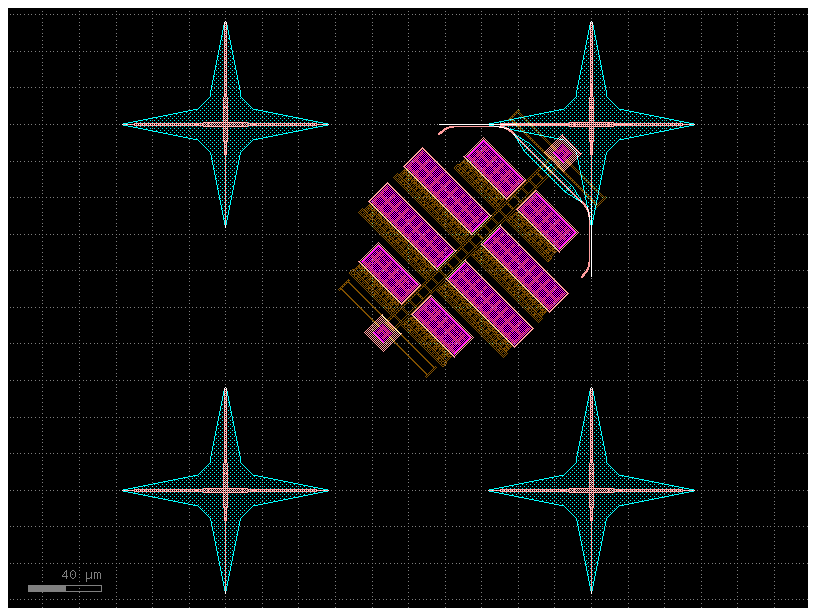

In [ ]:
setup = gf.Component()

w0 = 0.45
w_s1 = 1.1
w_c = 2.2
l_s1 = 0
l_t1 = 40 #l_t1 = 10*0+30
l_s2 = 1
l_t2 = 6
l_c = 18.5
w0_slab = 5*0+0.45
w_s1_slab = 16+0.45

WG_cross_temp = draw_waveguide_cross(w0, w_s1, w_c, l_s1, l_t1, l_s2, l_t2, l_c, w0_slab, w_s1_slab)
WG_cross = setup.add_ref(WG_cross_temp)

proof_length = 7; proof_height = 130
hole_diameter = 5; hole_gap = 0.8
proof_length = int((proof_length-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap; proof_height = int((proof_height-hole_gap)/(hole_diameter+hole_gap))*(hole_diameter+hole_gap)+hole_gap

spring_length = 30; spring_width = 0.5
spring_gap = 5; pad_length = 8; pad_width = 0.8

num_combs = 4
finger_length = 4; finger_width = 0.5; finger_gap = 0.5
finger_distance = 2.5; num_pair_array = [15, 25, 25, 15]
edge_fixed_array = [1, 1, 1, 1]; holder_linewidth = 0.8
holder_width_move_array = [3, 3, 3, 3]; holder_width_fixed_array = [12, 12, 12, 12]
holder_gap_min = 2; holder_top_over_array = [0.3, 0.3, 0.3, 0.3]; holder_bottom_over_array = [1.5, 1.5, 1.5, 1.5]
holder_distance_array = [0, 0, 0, 0]
for ii in range(num_combs):
    L = num_pair_array[ii]*2*(finger_width+finger_gap)+finger_width + 2*edge_fixed_array[ii]; W = holder_width_move_array[ii] - holder_linewidth
    N = math.ceil(L/W); holder_distance_array[ii] = (N+0)*W - L; # holder_distance = 1

spring_edge_upper = spring_edge_lower = 1
d = 27; x0 = 5; comb_edge_lower_array = [x0, x0+d, x0+2*d, x0+3*d]
anchor_edge_upper = anchor_edge_lower = 1
anchor_length_upper = anchor_length_lower = 1
anchor_width_upper = 5; anchor_width_lower = 5; anchor_SOI_over = 4

switch_MEMS_temp = draw_switch_MEMS3(proof_length, proof_height, hole_diameter, hole_gap,
                     spring_length, spring_width, spring_gap, pad_length, pad_width,
                     num_combs,
                     finger_length, finger_width, finger_gap, finger_distance, num_pair_array, edge_fixed_array,
                     holder_distance_array, holder_linewidth, holder_width_move_array, holder_width_fixed_array,
                     holder_gap_min, holder_top_over_array, holder_bottom_over_array,
                     spring_edge_upper, spring_edge_lower, comb_edge_lower_array,
                     anchor_edge_upper, anchor_edge_lower,
                     anchor_width_upper, anchor_width_lower, anchor_SOI_over)

switch_MEMS = setup.add_ref(switch_MEMS_temp)
switch_MEMS.drotate(-45); switch_MEMS.dmovex(-65); switch_MEMS.dmovey(-65)

input_width0 = 0.45; output_width0 = 0.45; 
input_width = 0.45; output_width = 0.45; coupling_length = 20
bend_length = 10; dc_gap = 0.135; extra_gap = 0.7
slab_width_full = 5; slab_width_half = 0; slab_taper_length = 10
turn_length = 16; turn_radius = 15

x1 = coupling_length/2+bend_length+slab_taper_length+turn_radius; y1 = output_width/2+extra_gap

coupler_bend_temp = draw_coupler_bend_full45(input_width0, output_width0, input_width, output_width, coupling_length, dc_gap, extra_gap, slab_width_full, slab_width_half, slab_taper_length, turn_radius, turn_length)
coupler_bend = setup.add_ref(coupler_bend_temp)

WG_temp = draw_straight(length = 2*x1, width=w0, layer=layer_Si_full)
input_WG = setup.add_ref(WG_temp)
input_WG.dmovex(-1.5*x1)
output_WG = setup.add_ref(WG_temp)
output_WG.drotate(90); output_WG.dmovey(-1.5*x1)


pitch = 200
WG_cross_left = setup.add_ref(WG_cross_temp)
WG_cross_down = setup.add_ref(WG_cross_temp)
WG_cross_diag = setup.add_ref(WG_cross_temp)
WG_cross_left.dmovex(-pitch); WG_cross_down.dmovey(-pitch)
WG_cross_diag.dmovex(-pitch); WG_cross_diag.dmovey(-pitch)


setup.plot()
setup.show()

In [ ]:
#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_ring(radius_in, radius_out, theta_start, theta_end, layer):
    
    radius = (radius_in + radius_out)/2; width = radius_out - radius_in
    ring_full = gf.components.ring(radius, width, angle_resolution=0.1, layer=layer)

    wedge = gf.Component()
    wedge.add_polygon([(0,0), (radius_in*math.cos(theta_start), radius_in*math.sin(theta_start)), (radius_out*math.cos(theta_start), radius_out*math.sin(theta_start)), (10*radius*math.cos(theta_start), 10*radius*math.sin(theta_start)), (10*radius*math.cos(theta_end), 10*radius*math.sin(theta_end)), (radius_out*math.cos(theta_end), radius_out*math.sin(theta_end)), (radius_in*math.cos(theta_end), radius_in*math.sin(theta_end))], layer=layer)

    #ring_sector = gf.Component()
    operation = "and"
    ring_sector = gf.boolean(ring_full, wedge, operation=operation, layer=layer)

    return ring_sector


#def draw_disk(radius, port_edge, port_width, layer):
@gf.cell #use this decreator for automatic name saving & avoid duplicate names
def draw_grating_coupler(input_WG_length, input_WG_width, grating_width, etch_width, num_etch, y_span, radius_length, extra_length):
    
    grating_coupler = gf.Component()

    # Proff Mass with Release Holes
    input_WG_temp = gf.Component()
    input_WG_temp = gf.components.rectangle(size=(input_WG_length, input_WG_width), layer=layer_Si_full); input_WG = grating_coupler.add_ref(input_WG_temp)
    input_WG.dmovex(-input_WG_length - radius_length); input_WG.dmovey(-input_WG_width/2)

    theta = math.asin(1/2*y_span / radius_length)
    grating_length = num_etch*grating_width + (num_etch+1)*etch_width
    Si_ring_sector_temp = draw_ring(radius_length*math.cos(theta), radius_length + grating_length + extra_length, -theta, theta, layer = layer_Si_full)
    Si_ring_sector = grating_coupler.add_ref(Si_ring_sector_temp)
    Si_ring_sector.dmovex(-radius_length)

    #grating_partial_etch_temp = array(1); grating_partial_etch = []
    for ii in range(num_etch+1):
        radius_start = radius_length + ii*(grating_width+etch_width)
        radius_end = radius_length + ii*(grating_width+etch_width) + etch_width
        grating_partial_etch_temp = draw_ring(radius_start, radius_end, -theta-1*math.pi/180, theta+1*math.pi/180, layer = layer_Si_partial)
        grating_partial_etch = grating_coupler.add_ref(grating_partial_etch_temp)
        grating_partial_etch.dmovex(-radius_length)


    Ltaper = radius_length*math.cos(theta); x0 = Ltaper # x0 = Ltaper/2
    w1 = input_WG_width/2; w2 = y_span/2
    m = 1.15
    alpha = (w1 - w2) / (Ltaper ** m)
    npts = 200

    top = []; bot = []
    for jj in range(npts + 1):
        x = Ltaper * jj / npts
        y = alpha * (abs(x0 - x) ** m) + w2
        top.append((x,  y)); bot.append((x, -y))

    vtx = top + list(reversed(bot))

    taper_temp = gf.Component()
    taper_temp.add_polygon(vtx, layer=layer_Si_full); taper = grating_coupler.add_ref(taper_temp)
    taper.dmovex(-radius_length)

    return grating_coupler    



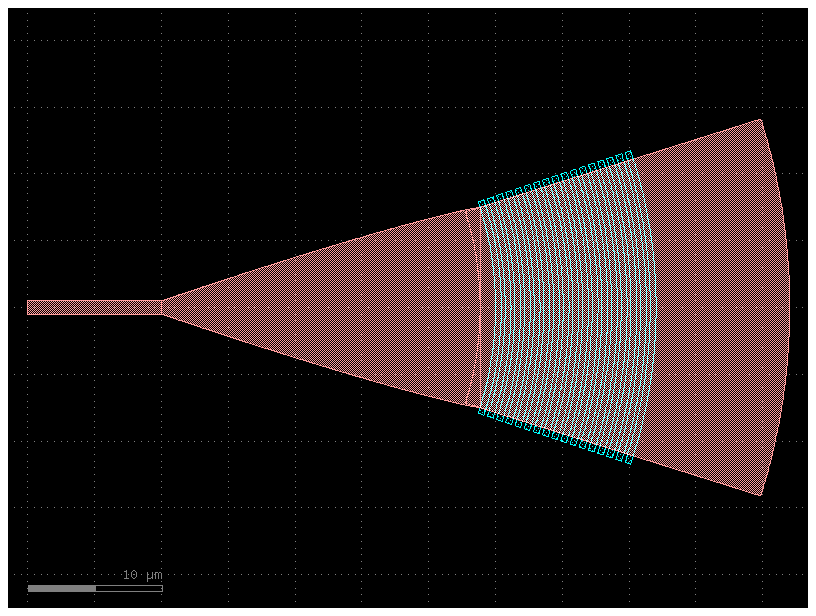

In [ ]:
# ring_test = draw_ring(10, 12, -20*math.pi/180, 20*math.pi/180, (1,0))
# ring_test.plot()
# ring_test.show()

input_WG_length = 10; input_WG_width = 1
grating_width = 0.287; etch_width = 0.437; num_etch = 16
y_span = 15; radius_length = 25; extra_length = 10

GC_test = draw_grating_coupler(input_WG_length, input_WG_width, grating_width, etch_width, num_etch, y_span, radius_length, extra_length)
GC_test.plot()
GC_test.show()

In [6]:

import openpyxl

wb = openpyxl.load_workbook('/Users/neekon/git/mcw/mcw-mems-photonic-switch/docs/mcw-optical-mems-master-document.xlsx', data_only=True)
print("Sheet names:", wb.sheetnames)


ModuleNotFoundError: No module named 'openpyxl'